## Scrapping Data Google Play

In [205]:
# !pip install google-play-scraper

# from google_play_scraper import app, Sort, reviews
# import pandas as pd
# import numpy as np

# result, continuation_token = reviews(
#     'com.bukalapak.android',
#     lang= 'in',
#     sort=Sort.NEWEST,
#     count = 30000,
#     filter_score_with= None  
# )

In [206]:
# df = pd.DataFrame(np.array(result), columns=['review'])
# df = df.join(pd.DataFrame(df.pop('review').tolist()))
# df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ac2887b2-e174-4b32-9edf-307334b64f78,E MUAMAR S,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa ribet sekali ingin mengganti alamat sur...,1,106,5.37.2,2023-11-18 04:48:36,None,NaT,5.37.2
1,2f6c43b8-430b-4932-a8e8-f1a680005392,Maulana Malik Ibrahim,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,20,5.36.1,2023-11-20 14:32:49,"Hai, mohon maaf atas kendalanya. Mohon infokan...",2020-07-20 19:16:48,5.36.1
2,6340e0eb-52d1-460d-87ac-d2dcf828086d,Muhammad Farid,https://play-lh.googleusercontent.com/a-/ALV-U...,Salah satu Aplikasi e-commerce yang keren untu...,5,83,5.37.2,2023-11-07 10:01:29,None,NaT,5.37.2


**Observation**

Scraping dilakukan pada tanggal 28 November 2023

### Save to CSV File

In [209]:
# df.to_csv('data/bukalapak_review.csv', index=False)

## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')
import re
import string
import wordcloud
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [23]:
sns.set_style('whitegrid')

In [8]:
path = 'data/bukalapak_review.csv'
review = pd.read_csv(path)

In [9]:
review.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ac2887b2-e174-4b32-9edf-307334b64f78,E MUAMAR S,https://play-lh.googleusercontent.com/a/ACg8oc...,Kenapa ribet sekali ingin mengganti alamat sur...,1,106,5.37.2,2023-11-18 04:48:36,NaN,NaN,5.37.2
1,2f6c43b8-430b-4932-a8e8-f1a680005392,Maulana Malik Ibrahim,https://play-lh.googleusercontent.com/a/ACg8oc...,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,20,5.36.1,2023-11-20 14:32:49,"Hai, mohon maaf atas kendalanya. Mohon infokan...",2020-07-20 19:16:48,5.36.1
2,6340e0eb-52d1-460d-87ac-d2dcf828086d,Muhammad Farid,https://play-lh.googleusercontent.com/a-/ALV-U...,Salah satu Aplikasi e-commerce yang keren untu...,5,83,5.37.2,2023-11-07 10:01:29,NaN,NaN,5.37.2


## Data Understanding

In [10]:
review.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  22043 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          10671 non-null  object
 9   repliedAt             10671 non-null  object
 10  appVersion            22043 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


**Data Description**

- reviewID : User ID review
- userName : name of user who reviewed
- userImage : URL image reviewer
- content : text review
- score : rating score
- thumbsUpCount : supported and preferred reviews
- reviewCreatedVersion  : review is based on the application version
- at : date review was made
- replyContent : review reply from provider
- repliedAt : date review reply was made
- appVersion : version of apps

### Data and Missing Value Checking

In [11]:
missing = []
variables = []
types = []
count = []
uniques = []
percent = []

for col in review.columns:
    missing.append(review[col].isna().sum())
    percent.append(review[col].isna().mean()*100)
    variables.append(col)
    types.append(review[col].dtype)
    count.append(len(review[col]))
    uniques.append(review[col].nunique())
    

missing_values = pd.DataFrame({'Variables' : variables,
                               'Types' : types,
                               'Count' : count,
                               'Uniques' : uniques,
                               'Missing' : missing,
                               'Percent' : percent
})

missing_values

,Variables,Types,Count,Uniques,Missing,Percent
0,reviewId,object,30000,28756,0,0.000000
1,userName,object,30000,17544,0,0.000000
2,userImage,object,30000,17776,0,0.000000
3,content,object,30000,28701,0,0.000000
4,score,int64,30000,5,0,0.000000
5,thumbsUpCount,int64,30000,258,0,0.000000
6,reviewCreatedVersion,object,30000,323,7957,26.523333
7,at,object,30000,28746,0,0.000000
8,replyContent,object,30000,3607,19329,64.430000
9,repliedAt,object,30000,10166,19329,64.430000


**Observation**

there are missing values in the `reviewCreatedVersion, replyContent, repliedAt, appVersion` feature.

### Duplicate Checking

In [12]:
review.duplicated(subset='reviewId').sum()

1244

**Observation**

there are 1244 duplicate data but the `reviewId` feature will be dropped because not used for sentiment analysis

### Descriptive Statistic

**Categorical Data**

In [13]:
review.select_dtypes('O').describe().T

,count,unique,top,freq
reviewId,30000,28756,457a8d9c-5e18-442f-9adf-b296ec478465,2
userName,30000,17544,Pengguna Google,11441
userImage,30000,17776,https://play-lh.googleusercontent.com/EGemoI2N...,11441
content,30000,28701,Saya salah satu peserta Prakerja yang berbelan...,5
reviewCreatedVersion,22043,323,4.72.3,998
at,30000,28746,2020-09-20 12:30:44,3
replyContent,10671,3607,"Hai, mohon maaf atas kendalanya. Mohon infokan...",1098
repliedAt,10671,10166,2019-05-14 09:18:57,5
appVersion,22043,323,4.72.3,998


**Observation**

- reviewId is unique value and will be dropped
- the most data from userName is A Google user
- the most data from content review is reviews by user
- the most data from reviewCreatedVersion is 4.72.3
- the most data from replyContent is an apology from the provider
- the most data from appVersion os 4.72.3

**Numerical Data**

In [14]:
review.select_dtypes(exclude='O').describe().T

,count,mean,std,min,25%,50%,75%,max
score,30000.0,3.392333,1.796584,1.0,1.0,5.0,5.0,5.0
thumbsUpCount,30000.0,4.393833,37.032064,0.0,0.0,0.0,1.0,2449.0


**Observation**

- the distribution of the score feature tends to be negatively skewed because the Median is greater than the Mean.
- There are data irregularities in thumbsupCount where in quantiles 25, 50, 75 the number is 0 while the maximum is very high.

## Data Preparation

### Data Cleaning

#### Missing Value Handling

Because the features `replyContent, repliedAt` have a lot of missing data, they will be dropped along with the features `userImage, reviewCreatedVersion, appVersion, thumbsUpCount` because they are not used for sentiment analysis.

In [15]:
review.drop(['userImage','reviewCreatedVersion', 'replyContent','repliedAt', 'appVersion','thumbsUpCount'], axis=1, inplace=True)

In [16]:
review.isna().sum()

reviewId    0
userName    0
content     0
score       0
at          0
dtype: int64

**Observation**

Now there are no missing values

#### Duplicate Handling

Because there 1244 duplicate value in `reviewId` so here will be dropped

In [17]:
review_clean = review.drop_duplicates(subset='reviewId')

In [18]:
review_clean.duplicated(subset='reviewId').sum()

0

**Observation**

There's no duplicated value

Also `reviewId` Feature not used for sentiment analysis so will be dropped

In [19]:
review_clean.drop('reviewId', axis=1, inplace=True)

In [20]:
review_clean.head(3)

,userName,content,score,at
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18 04:48:36
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20 14:32:49
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07 10:01:29


#### Converting Feature to DateTime Type

In [21]:
review_clean['at'] = pd.to_datetime(review_clean['at'], format='%Y-%m-%d').dt.date
review_clean['at'] = pd.to_datetime(review_clean['at'])

In [22]:
review_clean.head(3)

,userName,content,score,at
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07


**Renaming Feature**

In [23]:
review_clean.rename(columns={'userName': 'user_name',
                             'content' : 'text_reviews',
                             'score' : 'rating_score',
                             'thumbsUpCount' : 'thumbs_up_count',
                             'at' : 'create_at'}, inplace=True)

In [24]:
review_clean.head(3)

,user_name,text_reviews,rating_score,create_at
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07


**Observation**

feature has been renamed

#### Saving Dataset

In [25]:
review_clean.to_csv('../Final Project/data/bukalapak_review_clean.csv', index=False)

In [26]:
review_cleans = pd.read_csv('../Final Project/data/bukalapak_review_clean.csv')

### Text Preprocessing

#### Case Folding

The purpose of case folding is to convert all letters in the document into lowercase letters. Only letters 'a' to 'z' are accepted. Characters other than letters are removed and considered delimiters. 

In [27]:
def clean(text):
    text = str(text).lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub(r'#', '', text)
    #remove special character
    text = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])','',text)
    
    #remove punctuation
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', ' ', text) #remove new line
    text = re.sub('\w*\d\w*', '', text) #remove text contains number
    
    return text

review_cleans['text_clean'] = review_cleans['text_reviews'].apply(clean)

In [28]:
review_cleans.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...


#### Tokenizing

Decomposing each word or phrase into smaller ones, so as to identify keywords and word patterns, this tokenizing process will use the nltk library.

In [29]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

review_cleans['text_token']= review_cleans['text_clean'].apply(tokenize_text)
review_cleans.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean,text_token
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"[kenapa, ribet, sekali, ingin, mengganti, alam..."
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"[tolong, di, perbaiki, sistemnyadari, segi, pe..."
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"[salah, satu, aplikasi, ecommerce, yang, keren..."


**Observation**

Text has been separated into smaller words

#### Replace Slang, Replace Word Elongation

Since Indonesian people use slang/jargon words and excessive affixes in informal texting. Then these words must be converted into formal words. So here I use indoNLP library to handle slang and elongation and stop words.

- replace_slang to handle slang
- replce_word_elongation to handle word elongation
- remove_stopwords to remove stop words

In [30]:
!pip install indoNLP

In [32]:
from indoNLP.preprocessing import remove_stopwords, replace_slang, replace_word_elongation

def preprocess_text(token):
    text = ' '.join(token)
    text = replace_slang(text)
    text = replace_word_elongation(text)
    text = remove_stopwords(text)
    
    text_preprocess = text.split()
    return text_preprocess

review_cleans['text_stopwords'] = review_cleans['text_token'].apply(lambda x: preprocess_text(x) if isinstance(x, list) else x)

#### Stopwords Filtering

Stopwords are re-done to remove words that are not important (meaningless) so that they will not affect the sentiment results. The library that will be used uses Sastrawi and stopwords from nltk.

In [33]:
!pip install Sastrawi
import Sastrawi

In [34]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword_sastrawi = factory.get_stop_words()
stopword=set(stopwords.words('indonesian'))

In [35]:
def stopwords_text(tokens):
    clean_token = []
    for token in tokens:
        if token not in stopword_sastrawi and token not in stopword:
            clean_token.append(token)
    return clean_token

review_cleans['text_stopwords'] = review_cleans['text_stopwords'].apply(stopwords_text)
review_cleans.head()

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"[kenapa, ribet, sekali, ingin, mengganti, alam...","[ribet, mengganti, alamat, surel, aktif, buka,..."
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"[tolong, di, perbaiki, sistemnyadari, segi, pe...","[perbaiki, sistemnyadari, segi, pengambilan, p..."
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"[salah, satu, aplikasi, ecommerce, yang, keren...","[salah, aplikasi, ecommerce, keren, kalangan, ..."
3,Anang Arjian Gusdarmanda,Gampang penipuan dan verifikasi login akun di ...,1,2023-11-24,gampang penipuan dan verifikasi login akun di ...,"[gampang, penipuan, dan, verifikasi, login, ak...","[gampang, penipuan, verifikasi, login, akun, p..."
4,Arief Darmawan,Saya pelanggan setia loh di Bukalapak... Sudah...,3,2023-11-06,saya pelanggan setia loh di bukalapak sudah be...,"[saya, pelanggan, setia, loh, di, bukalapak, s...","[pelanggan, setia, loh, bukalapak, pembayaran,..."


**Observation**

the words `in text_token` have had their stopwords removed and stored in the `text_stopword` feature so that they only contain important or meaningful words.

#### Stemming

Stemming is used to convert words into root words. In this project, Stemming uses the Sastrawi library because the reviews in the dataset use Indonesian.

In [37]:
# #Import stemmerFactory yang terdapat pada sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# stem_factory = StemmerFactory()
# stemmer = stem_factory.create_stemmer()

# review_cleans['stemmed_text'] = review_cleans['text_stopwords'].apply(lambda tokens: ' '.join([stemmer.stem(x) for x in tokens]))

**Note**

Saving file after stemming because stemming using sastrawi takes a long time

In [593]:
review_cleans.to_csv('data/bukalapak_review_stemmed.csv', index=False)

In [854]:
review_stem = pd.read_csv('data/bukalapak_review_stemmed.csv')

In [855]:
review_stem.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat surel aktif buka bantu suru...
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik sistemnyadari segi ambil presentase lapak...
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah aplikasi ecommerce keren kalang oke oke ...


View the number of each word that appears to be further analyzed for words that have no meaning.

In [856]:
from collections import Counter

review_stem['stemmed_text'] = review_stem['stemmed_text'].astype(str)
word_counts = Counter(' '.join(review_stem['stemmed_text']).split())
rev_wc = pd.DataFrame(list(word_counts.items()), columns=['Word','Count'])

rev_wc = rev_wc.sort_values('Count', ascending=False)
rev_wc.head(10)

,Word,Count
71,bukalapak,16866
51,aplikasi,9125
61,nya,8114
24,beli,8102
220,barang,8100
620,mudah,6716
1212,latih,6598
35,lapak,6351
5,buka,6275
1239,prakerja,5453


**Note**

After deep diving the stemmed text, there are words that have no meaning and have been saved in the form of csv files.

**Load meaningless words**

In [857]:
words_meaningless = pd.read_csv('data/kamus slang dan meaningless kata/words.csv', delimiter=';')

In [858]:
words_to_remove = words_meaningless.Word.values.tolist()
words_to_remove

['nya',
 'banget',
 'bl',
 'kali',
 'skil',
 'sih',
 'deh',
 'pas',
 'nih',
 'biar',
 'bikin',
 'erti',
 'ajar',
 'gue',
 'tau',
 'ap',
 'top',
 'halo',
 'lot',
 'min',
 'up',
 'alhamdulillah',
 'live',
 'apa',
 'eh',
 'aju',
 'duit',
 'alas',
 'assalamualaikum',
 'cuman',
 'n',
 'hai',
 'ribu',
 'alam',
 'gua',
 'wawas',
 'dl',
 'the',
 'deal',
 'mulu',
 'asih',
 'tuh',
 'eror',
 'by',
 'otp',
 'log',
 'ku',
 'blanja',
 'apl',
 'fre',
 'perhati',
 'mah',
 'push',
 'sms',
 'rp',
 'pasuk',
 'pengin',
 'vocer',
 'dah',
 'ful',
 'amin',
 'bos',
 'geti',
 'kait',
 'an',
 'situ',
 'out',
 'gan',
 'kalap',
 'ram',
 'wa',
 'tera',
 'is',
 'ane',
 'ijo',
 'e',
 'loh',
 'indak',
 'lu',
 'balikin',
 'cal',
 'batu',
 'ah',
 'tahi',
 'payleter',
 'al',
 'tele',
 'aduh',
 'sok',
 'tks',
 'pajang',
 'ngisi',
 'dar',
 'tf',
 'hehe',
 'sila',
 'sip',
 'terimah',
 'oren',
 'bolak',
 'set',
 'rek',
 'itu',
 'lai',
 'lampir',
 'academi',
 'pasu',
 'ecek',
 'jos',
 'overal',
 'belit',
 'byr',
 'a',
 'caka

**Observation**

There are many words that have no meaning, so here they will be dropped

In [859]:
def remove_meaningless(sentence, words_remove):
    
    words = sentence.split()
    filter_words = [word for word in words if word not in words_to_remove]
    return ' '.join(filter_words)

review_stem['stemmed_text'] = review_stem['stemmed_text'].apply(lambda x: remove_meaningless(x, words_to_remove))

**Recheck after remove meaningless words**

In [860]:
review_stem['stemmed_text'] = review_stem['stemmed_text'].astype(str)
word_counts = Counter(' '.join(review_stem['stemmed_text']).split())
rev_wc = pd.DataFrame(list(word_counts.items()), columns=['Word','Count'])

rev_wc = rev_wc.sort_values('Count', ascending=False)
rev_wc.head(10)

,Word,Count
23,beli,8102
196,barang,8100
547,mudah,6716
1055,latih,6598
34,lapak,6351
5,buka,6275
1077,prakerja,5453
159,belanja,5451
6,bantu,4830
27,bayar,4102


##### Removing Words that appear only once

Remove words that only appear once because after looking at the data the word does not contain meaning and mostly wrong typing to reduce noise during model training.

In [861]:
rev_wc[rev_wc['Count'] == 1]

,Word,Count
20044,greenstore,1
23838,dulukecewa,1
23919,repos,1
23853,testimony,1
23954,penjelasn,1
...,...,...
14114,supay,1
14112,responbagaimana,1
14111,dibukasedang,1
14110,rumahanumkmmateri,1


In [862]:
all_words = ' '.join(review_stem['stemmed_text']).split()
word_counts = Counter(all_words)

review_stem['stemmed_text'] = review_stem['stemmed_text'].apply(lambda x: ' '.join([word for word in x.split() if word_counts[word] > 1]))
review_stem.head()

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat aktif buka bantu suruh foto...
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik segi ambil lapak daftar super otomatis ka...
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah ecommerce keren oke oke pokok accapprove...
3,Anang Arjian Gusdarmanda,Gampang penipuan dan verifikasi login akun di ...,1,2023-11-24,gampang penipuan dan verifikasi login akun di ...,"['gampang', 'penipuan', 'dan', 'verifikasi', '...","['gampang', 'penipuan', 'verifikasi', 'login',...",gampang tipu verifikasi login akun perangkat p...
4,Arief Darmawan,Saya pelanggan setia loh di Bukalapak... Sudah...,3,2023-11-06,saya pelanggan setia loh di bukalapak sudah be...,"['saya', 'pelanggan', 'setia', 'loh', 'di', 'b...","['pelanggan', 'setia', 'loh', 'bukalapak', 'pe...",langgan setia bayar akulaku ganggu terang akul...


##### Rechecking Words after removing Words that appear only once

In [863]:
review_stem['stemmed_text'] = review_stem['stemmed_text'].astype(str)
word_counts = Counter(' '.join(review_stem['stemmed_text']).split())
rev_wc = pd.DataFrame(list(word_counts.items()), columns=['Word','Count'])

rev_wc = rev_wc.sort_values('Count', ascending=False)
rev_wc.head(10)

,Word,Count
21,beli,8102
168,barang,8100
443,mudah,6716
807,latih,6598
29,lapak,6351
4,buka,6275
824,prakerja,5453
133,belanja,5451
5,bantu,4830
25,bayar,4102


In [864]:
rev_wc[rev_wc['Count'] == 1]

,Word,Count


**Observation**

There's no word that only appears once

#### Rechecking Null Value in Text after Text Preprocessing 

In [865]:
review_stem_null = review_stem[review_stem['stemmed_text'].str.strip()=='']
review_stem_null

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text
834,Masduqi Abd. Lathif,"Semula bukalapak itu biasa saja, lama² luar bi...",5,2023-08-30,semula bukalapak itu biasa saja lama luar bias...,"['semula', 'bukalapak', 'itu', 'biasa', 'saja'...",['bukalapak'],
2065,Iskandar Ghoiz,aplikasi bagus...server kurang baguuss..?????,3,2023-09-11,aplikasi bagusserver kurang baguuss,"['aplikasi', 'bagusserver', 'kurang', 'baguuss']","['aplikasi', 'bagusserver', 'baguus']",
2367,yogie S,"Sangat membantu,mantap.",5,2023-11-21,sangat membantumantap,"['sangat', 'membantumantap']",['membantumantap'],
2498,Dede Supriadi,"Selama ini belom ada keluhan,,,baik-baik saja",5,2023-11-08,selama ini belom ada keluhanbaikbaik saja,"['selama', 'ini', 'belom', 'ada', 'keluhanbaik...",['keluhanbaikbaik'],
2512,Muhamad Nugraha,"saya suka,karena semuanya ada",5,2023-11-16,saya sukakarena semuanya ada,"['saya', 'sukakarena', 'semuanya', 'ada']",['sukakarena'],
2530,choirul anwar,Aplikasinya tambah lemot,4,2023-11-15,aplikasinya tambah lemot,"['aplikasinya', 'tambah', 'lemot']","['aplikasinya', 'lemot']",
4683,Rahmat Kurniawan,playleter nya ga bisa di gunakan,5,2023-10-02,playleter nya ga bisa di gunakan,"['playleter', 'nya', 'ga', 'bisa', 'di', 'guna...","['playleter', 'nya']",
13602,Chevi Hidayat,Tidak menguciwakan..BL top deh,5,2023-10-08,tidak menguciwakanbl top deh,"['tidak', 'menguciwakanbl', 'top', 'deh']","['menguciwakanbl', 'top', 'deh']",
13645,febri ariyanto,Aplikasi yg sangat ok sekali,5,2023-10-08,aplikasi yg sangat ok sekali,"['aplikasi', 'yg', 'sangat', 'ok', 'sekali']",['aplikasi'],
21846,Monique CR,Maknyuuuuuuuusssss top markotop....!!!!!.👍👍👍👍👍👍👍👍,5,2023-11-10,maknyuuuuuuuusssss top markotop,"['maknyuuuuuuuusssss', 'top', 'markotop']","['maknyuuuuuuuus', 'top', 'markotop']",


**Observation**

There are 14 data that have white space or null value. Then we will drop them

In [866]:
review_stem = review_stem[review_stem['stemmed_text'].str.strip()!='']
review_stem

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat aktif buka bantu suruh foto...
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik segi ambil lapak daftar super otomatis ka...
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah ecommerce keren oke oke pokok accapprove...
3,Anang Arjian Gusdarmanda,Gampang penipuan dan verifikasi login akun di ...,1,2023-11-24,gampang penipuan dan verifikasi login akun di ...,"['gampang', 'penipuan', 'dan', 'verifikasi', '...","['gampang', 'penipuan', 'verifikasi', 'login',...",gampang tipu verifikasi login akun perangkat p...
4,Arief Darmawan,Saya pelanggan setia loh di Bukalapak... Sudah...,3,2023-11-06,saya pelanggan setia loh di bukalapak sudah be...,"['saya', 'pelanggan', 'setia', 'loh', 'di', 'b...","['pelanggan', 'setia', 'loh', 'bukalapak', 'pe...",langgan setia bayar akulaku ganggu terang akul...
...,...,...,...,...,...,...,...,...
28751,Rahma Wati,Sangat membantu dalam belanja online di masa p...,5,2021-09-16,sangat membantu dalam belanja online di masa p...,"['sangat', 'membantu', 'dalam', 'belanja', 'on...","['membantu', 'belanja', 'online', 'pandemi', '...",bantu belanja online pandemi latih prakerjanya...
28752,ADI HARYANTO ANUNUT,"Slamat sore saya Adi haryanto Anunut, saya mem...",5,2021-03-08,slamat sore saya adi haryanto anunut saya memb...,"['slamat', 'sore', 'saya', 'adi', 'haryanto', ...","['selamat', 'sore', 'adi', 'haryanto', 'anunut...",selamat sore haryanto beli latih wawancara ker...
28753,Arsyakananta,Saya beli pulsa 2 kali dengan nilai 20.000 yan...,5,2022-05-30,saya beli pulsa kali dengan nilai yang masuk...,"['saya', 'beli', 'pulsa', 'kali', 'dengan', 'n...","['beli', 'pulsa', 'kali', 'nilai', 'masuk', 'c...",beli pulsa nilai masuk komplain jelas bayar ta...
28754,Nurul Fatimah,"Assalamualaikum,,,sya dr keanggotaan prakerja,...",5,2020-10-04,assalamualaikumsya dr keanggotaan prakerjaalha...,"['assalamualaikumsya', 'dr', 'keanggotaan', 'p...","['assalamualaikumsya', 'keanggotaan', 'prakerj...",anggota prakerjaalhamdulillah pilih latih vari...


In [867]:
review_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28742 entries, 0 to 28755
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_name       28742 non-null  object
 1   text_reviews    28742 non-null  object
 2   rating_score    28742 non-null  int64 
 3   create_at       28742 non-null  object
 4   text_clean      28742 non-null  object
 5   text_token      28742 non-null  object
 6   text_stopwords  28742 non-null  object
 7   stemmed_text    28742 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


**Observation**

After removing null value or white space numbers of data in dataset is 28742

### Sentiment Labeling

For the Sentiment Label here will use `rating_score` that is:

- Sentiment Positive > 3
- Sentiment Negative <= 3

In [868]:
review_stem['sentiment'] = np.where(review_stem['rating_score'] > 3, 'Positive', 'Negative')

In [869]:
review_stem.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text,sentiment
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat aktif buka bantu suruh foto...,Negative
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik segi ambil lapak daftar super otomatis ka...,Positive
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah ecommerce keren oke oke pokok accapprove...,Positive


In [870]:
review_stem['sentiment'].value_counts()

Positive    16229
Negative    12513
Name: sentiment, dtype: int64

In [871]:
review_stem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28742 entries, 0 to 28755
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_name       28742 non-null  object
 1   text_reviews    28742 non-null  object
 2   rating_score    28742 non-null  int64 
 3   create_at       28742 non-null  object
 4   text_clean      28742 non-null  object
 5   text_token      28742 non-null  object
 6   text_stopwords  28742 non-null  object
 7   stemmed_text    28742 non-null  object
 8   sentiment       28742 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


**Observation**

A new feature has been created which is `sentiment` and its values are `Positive and Negative`

**Saving Dataset after Cleaning and All Text Preprocessing**

In [872]:
review_stem.to_csv('data/bukalapak_review_final_clean.csv', index=False)

## Exploratory Data Analysis

In [24]:
review_data = pd.read_csv('data/bukalapak_review_final_clean.csv')
review_data.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text,sentiment
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat aktif buka bantu suruh foto...,Negative
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik segi ambil lapak daftar super otomatis ka...,Positive
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah ecommerce keren oke oke pokok accapprove...,Positive


In [25]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_name       28742 non-null  object
 1   text_reviews    28742 non-null  object
 2   rating_score    28742 non-null  int64 
 3   create_at       28742 non-null  object
 4   text_clean      28742 non-null  object
 5   text_token      28742 non-null  object
 6   text_stopwords  28742 non-null  object
 7   stemmed_text    28740 non-null  object
 8   sentiment       28742 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.0+ MB


In [26]:
review_data[review_data['stemmed_text'].isna()]

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text,sentiment
485,kolam terpal,𝗕𝘂𝗸𝗮𝗹𝗮𝗽𝗮𝗸 𝘁𝗮𝗺𝗯𝗮𝗵 𝗷𝗲𝗹𝗲𝗸 𝗮𝗷 𝗮𝗽𝗸 𝗻𝘆𝗮 𝗺𝘄 𝗻𝗮𝗺𝗯𝗮𝗵 𝗽𝗿...,1,2023-10-13,,[],[],NaN,Negative
737,Bima Putra06,𝙿𝚊𝚢𝚕𝚊𝚝𝚎𝚛 𝚐𝚊 𝚋𝚜 𝚍𝚒 𝚊𝚔𝚝𝚒𝚏𝚔𝚊𝚗 𝚍𝚊𝚗 𝚙𝚊𝚢𝚗𝚊𝚗𝚝𝚒 𝚓𝚍 𝚋𝚞𝚔...,5,2023-10-14,,[],[],NaN,Positive


**Observation**

After checking the dataset again, it turns out that there are 2 missing values, so it will be dropped first.

In [27]:
review_data.dropna(inplace=True)

In [28]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28740 entries, 0 to 28741
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_name       28740 non-null  object
 1   text_reviews    28740 non-null  object
 2   rating_score    28740 non-null  int64 
 3   create_at       28740 non-null  object
 4   text_clean      28740 non-null  object
 5   text_token      28740 non-null  object
 6   text_stopwords  28740 non-null  object
 7   stemmed_text    28740 non-null  object
 8   sentiment       28740 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


**Observation**

Data is clean from missing values after removing stemmed_text that is null value

### Univariate Analysis

#### Bar Plot Sentiment

In [29]:
review_data['sentiment'].value_counts()

Positive    16228
Negative    12512
Name: sentiment, dtype: int64

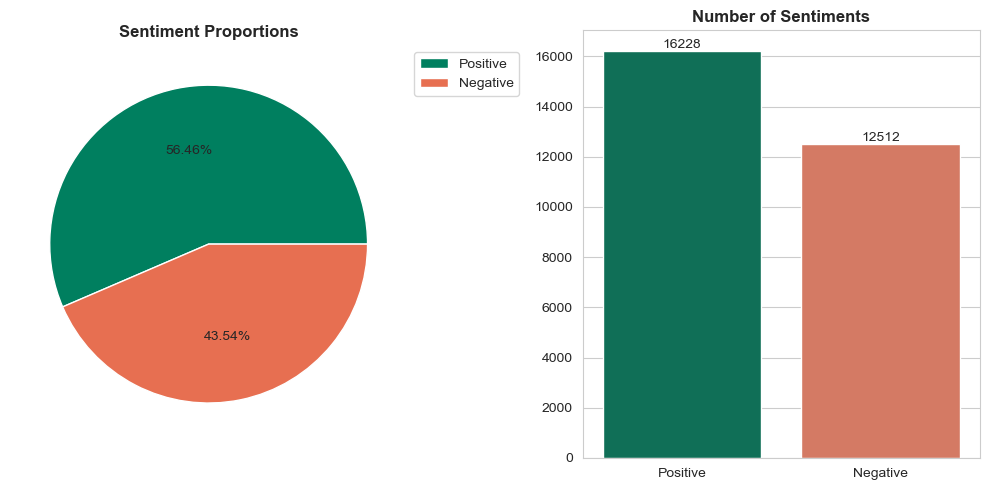

In [30]:
sentiment_count = review_data['sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(x=sentiment_count.values, autopct='%.2f%%', colors= ['#007f5f','#e76f51'])
axes[1]= sns.barplot(x= sentiment_count.index, y=sentiment_count.values, palette= ['#007f5f','#e76f51'])

# # Adding title to plot 
axes[0].set_title('Sentiment Proportions', fontdict={'fontweight':'bold'})
axes[1].set_title('Number of Sentiments', fontdict={'fontweight':'bold'})

# # Adding legend to plot
axes[0].legend(['Positive','Negative','Neutral'], bbox_to_anchor=(1, 1), loc='upper left')
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()

**Observation**

It can be seen that the highest proportion of sentiment in user reviews is Positive than negative sentiments.

#### Histogram Numerical Data

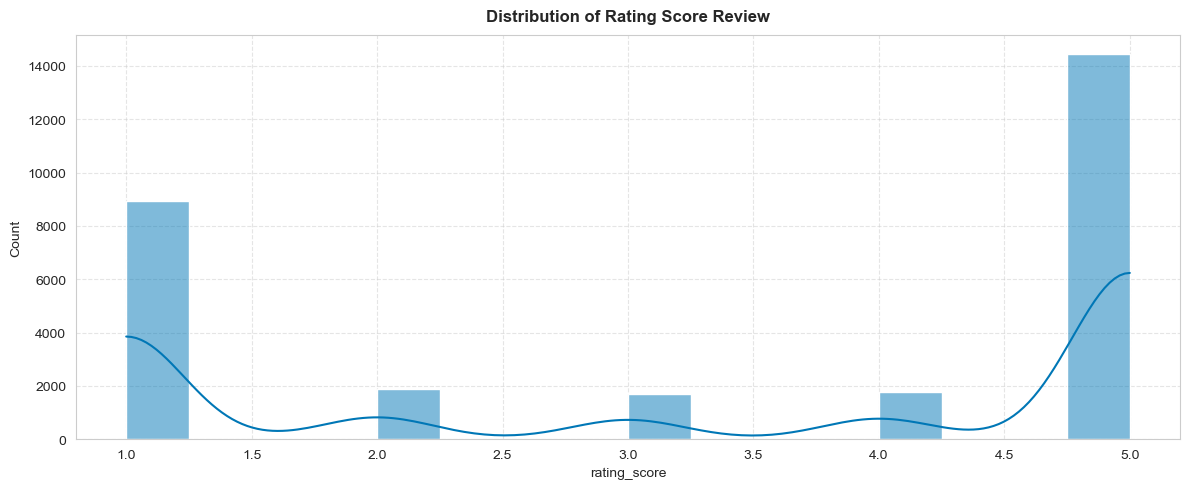

In [31]:
plt.figure(figsize = (12,5))
sns.histplot(review_data['rating_score'], color = '#0077b6', kde=True)
plt.title(f'Distribution of Rating Score Review', pad = 10, fontdict={'fontweight':'bold'})

plt.grid(True, zorder = 0, linestyle = "dashed", alpha = 0.5)
plt.tight_layout()
plt.show()

**Observation**

It can be seen that the highest distribution on `rating_score` is at 5 so it can be assumed that the application is good

#### Line Plot

In [32]:
fitur_date = review_data.copy()

In [33]:
fitur_date['year'] = pd.to_datetime(fitur_date['create_at'], format='%Y-%m-%d').dt.year
fitur_date['month'] = pd.to_datetime(fitur_date['create_at'], format='%Y-%m-%d').dt.strftime('%B')

**Total Reviews Year to Year**

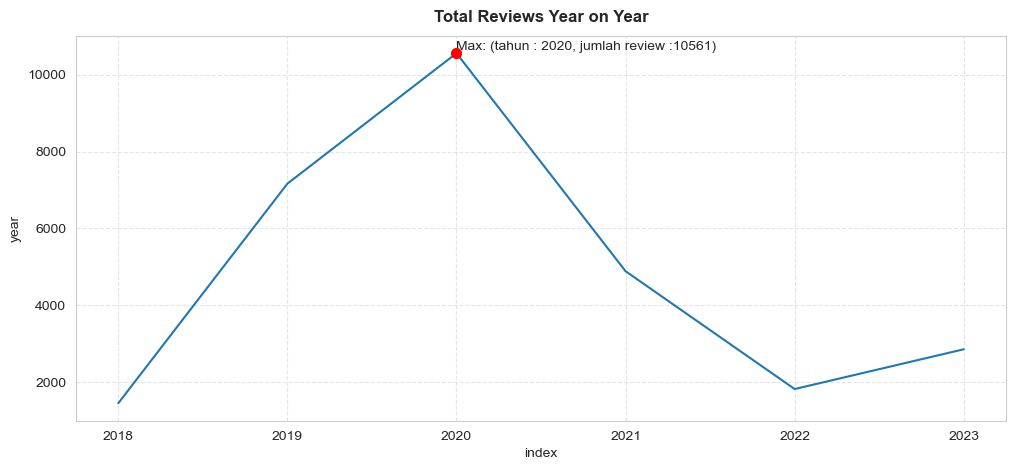

In [34]:
fitur_year= fitur_date['year'].value_counts().reset_index()
plt.figure(figsize=(12,5))
max_index = fitur_year.year.idxmax()
max_x = fitur_year.loc[max_index, 'index']
max_y = fitur_year.loc[max_index, 'year']

sns.lineplot(data = fitur_year, x='index', y='year')
plt.scatter(max_x, max_y, color='red', marker='o', s=50, zorder=5)
plt.text(max_x, max_y, f'Max: (tahun : {max_x}, jumlah review :{max_y})', fontsize=10, ha='left', va='bottom')
plt.grid(True, linestyle='dashed', alpha = 0.5)
plt.title('Total Reviews Year on Year',pad = 10, fontdict={'fontweight':'bold'})
plt.show()

**Observation**

The most number of reviews on Bukalapak is in 2020

**Total Reviews Month for Each Year**

In [35]:
fitur_month = fitur_date.groupby(['year','month']).size().reset_index(name='jumlah')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fitur_month['month'] = pd.Categorical(fitur_month['month'], categories=month_order, ordered=True)

# Urutkan DataFrame berdasarkan tahun dan bulan
fitur_month = fitur_month.sort_values(by=['year', 'month']).reset_index(drop=True)

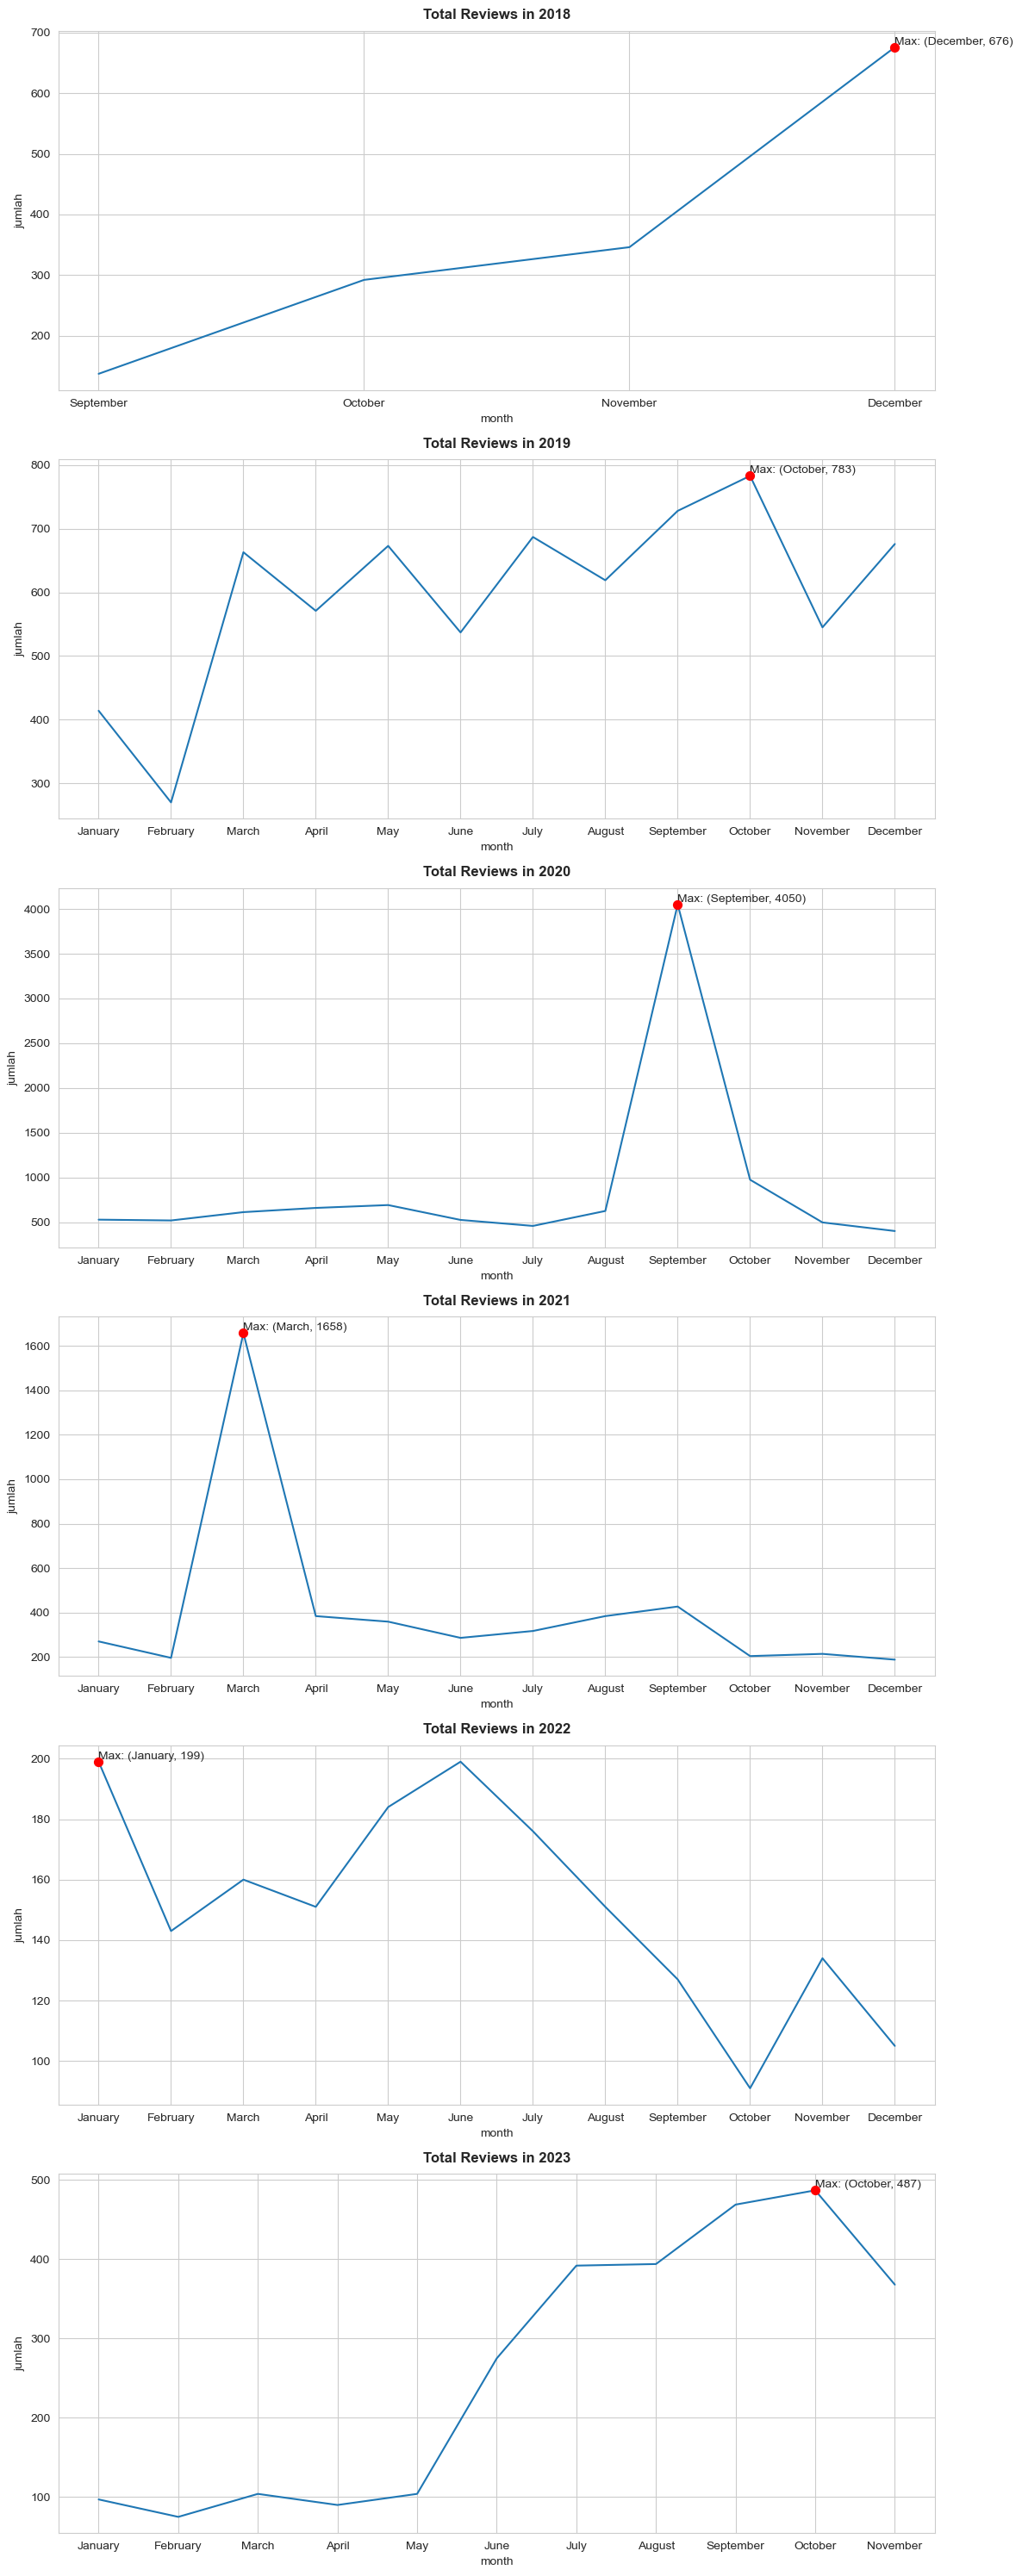

In [36]:
year = fitur_month.year.unique().tolist()
plt.figure(figsize=(12,30))

for i in range(len(year)):
    fitur = fitur_month[fitur_month['year']==year[i]]
    max_index = fitur.jumlah.idxmax()
    
    max_x = fitur.loc[max_index, 'month']
    max_y = fitur.loc[max_index, 'jumlah']
    
    plt.subplot(6, 1, i+1)
    ax = sns.lineplot(data = fitur, x= 'month', y='jumlah')
    plt.scatter(max_x, max_y, color='red', marker='o', s=50, zorder=5)
    plt.text(max_x, max_y, f'Max: ({max_x}, {max_y})', fontsize=10, ha='left', va='bottom')
    plt.title(f'Total Reviews in {year[i]}', pad = 10, fontdict={'fontweight':'bold'})

plt.tight_layout()
plt.show()


**Observation**

It can be seen that the most reviews in September 2020 were 4050, for further analysis of the number of reviews based on sentiment, the scope of the year will focus on 2023 or current year.

**Total Reviews in 2023**

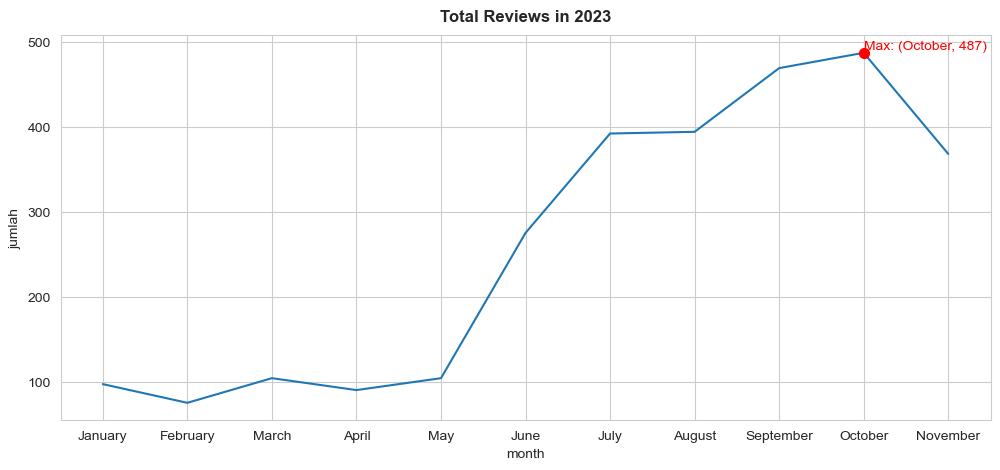

In [37]:
plt.figure(figsize=(12,5))

fitur = fitur_month[fitur_month['year']==year[i]]
max_index = fitur.jumlah.idxmax()
    
max_x = fitur.loc[max_index, 'month']
max_y = fitur.loc[max_index, 'jumlah']
ax = sns.lineplot(data = fitur, x= 'month', y='jumlah')
plt.scatter(max_x, max_y, color='red', marker='o', s=50, zorder=5)
plt.text(max_x, max_y, f'Max: ({max_x}, {max_y})', color='red', fontsize=10, ha='left', va='bottom')
plt.title(f'Total Reviews in {year[i]}', pad = 10, fontdict={'fontweight':'bold'})

plt.show()

In [38]:
fitur_tot_review = fitur_date[fitur_date['year']==2023].groupby(['year','month','sentiment']).size().reset_index(name='jumlah')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fitur_tot_review['month'] = pd.Categorical(fitur_tot_review['month'], categories=month_order, ordered=True)

# Urutkan DataFrame berdasarkan tahun dan bulan
fitur_tot_review = fitur_tot_review.sort_values(by=['year', 'month','sentiment']).reset_index(drop=True)

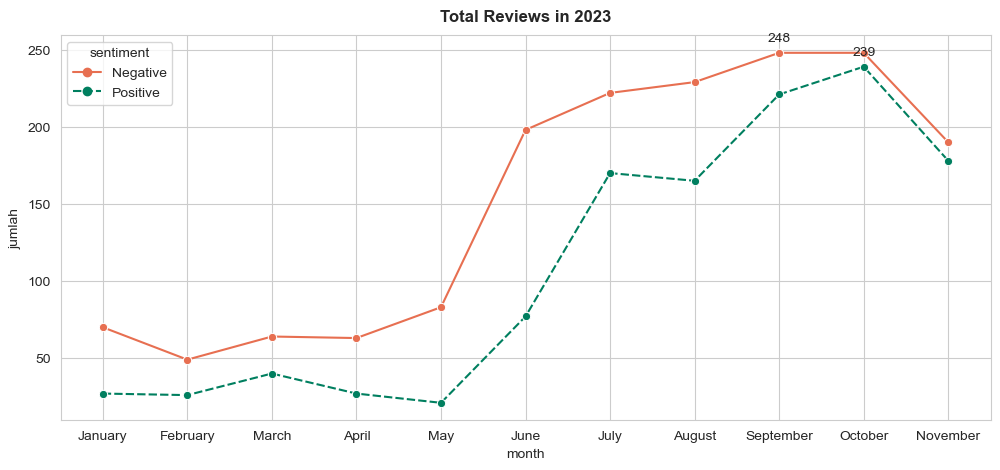

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume fitur_tot_review and year[i] are defined

plt.figure(figsize=(12, 5))

ax = sns.lineplot(data=fitur_tot_review, x='month', y='jumlah', hue='sentiment',
                  palette=['#e76f51', '#007f5f'], style='sentiment', markers='o')

# Annotate the highest points for each sentiment
for sentiment in fitur_tot_review['sentiment'].unique():
    max_value = fitur_tot_review[fitur_tot_review['sentiment'] == sentiment]['jumlah'].max()
    max_index = fitur_tot_review[(fitur_tot_review['sentiment'] == sentiment) & (fitur_tot_review['jumlah'] == max_value)].index[0]
    ax.annotate(f'{max_value}',
                xy=(fitur_tot_review.loc[max_index, 'month'], max_value),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                va='center')

plt.title(f'Total Reviews in {year[i]}', pad=10, fontdict={'fontweight': 'bold'})
plt.show()


**Observation**

It can be seen that the highest number of positive sentiments is in October while the highest number of negative sentiments is in September.

**Ratio Sentiment pada tahun 2023**

In [40]:
fitur_tot_review_pivot = fitur_tot_review.pivot_table(index='month', columns='sentiment', values='jumlah').reset_index()

# Hitung rasio positif dan negatif
fitur_tot_review_pivot['Positive/Negative Ratio'] = round(fitur_tot_review_pivot['Positive'] / fitur_tot_review_pivot['Negative'],2)
fitur_tot_review_pivot

sentiment,month,Negative,Positive,Positive/Negative Ratio
0,January,70,27,0.39
1,February,49,26,0.53
2,March,64,40,0.62
3,April,63,27,0.43
4,May,83,21,0.25
5,June,198,77,0.39
6,July,222,170,0.77
7,August,229,165,0.72
8,September,248,221,0.89
9,October,248,239,0.96


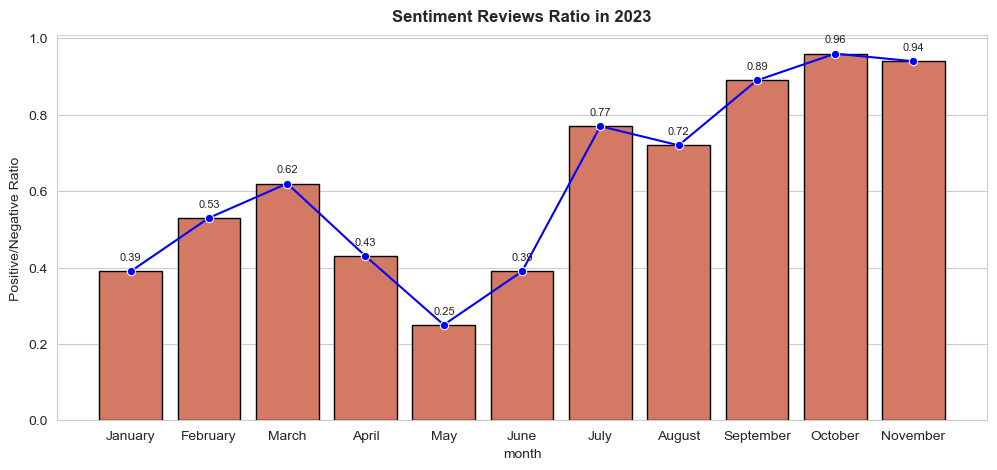

In [41]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 5))

# Bar plot
sns.barplot(data=fitur_tot_review_pivot, y='Positive/Negative Ratio', x='month', edgecolor='black', color='#e76f51', ax=axes)

# Line plot overlay
sns.lineplot(data=fitur_tot_review_pivot, y='Positive/Negative Ratio', x='month', marker='o', color='blue', ax=axes)

# Add labels to the bars
for p in axes.patches:
    axes.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

axes.set_title(f'Sentiment Reviews Ratio in 2023', pad=10, fontdict={'fontweight': 'bold'})
plt.show()


**Observation**

It can be seen that the ratio of positive and negative sentiment for highest ratio in October 2023 while lowest in May 2023.

### WordClouds Text

In [42]:
from wordcloud import WordCloud
def wordclouds(sentiment):
    wc_text = review_data[review_data['sentiment']==sentiment]
    text = ' '.join(i for i in wc_text['stemmed_text'])
    wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)
    
    words = text.lower().split()

    # Menghitung frekuensi kata
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    # Mengambil 10 kata paling sering muncul
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    words, counts = zip(*sorted_word_counts)
    
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(10,8))
    # Plot the word cloud
    axes[0].imshow(wordcloud, interpolation='bilinear')
    axes[0].axis('off')  
    axes[0].set_title(f'Word Cloud of Sentiment {sentiment}', pad=10, fontdict={'fontweight': 'bold'})
    
    # Membuat bar plot
    axes[1].barh(words[::-1], counts[::-1], color='#ffbe0b')
    axes[1].set_title('Top 10 Most Common Words', pad=10, fontdict={'fontweight': 'bold'})
    axes[1].set_xlabel('Words')
    axes[1].set_ylabel('Frequency')
    plt.show()

#### Wordcloud Sentiment Positive

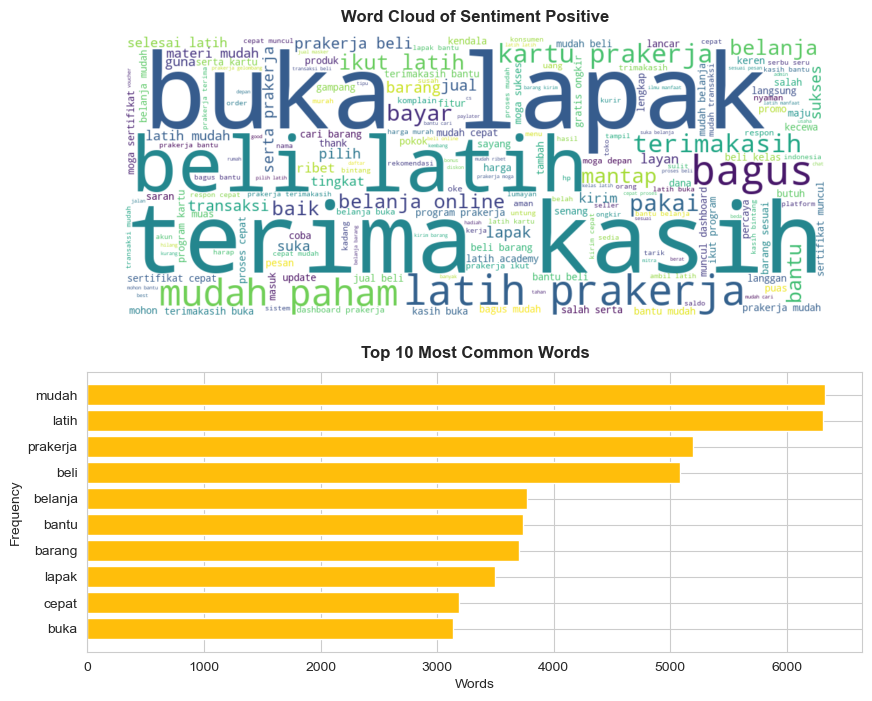

In [43]:
wordclouds('Positive')

**Observation**

It can be seen that for the most positive sentiments that appears in Wordclouds are the word "terima kasih, mudah, paham" and in barplot are "mudah, latih, prakerja"

#### Wordcloud Sentiment Negative

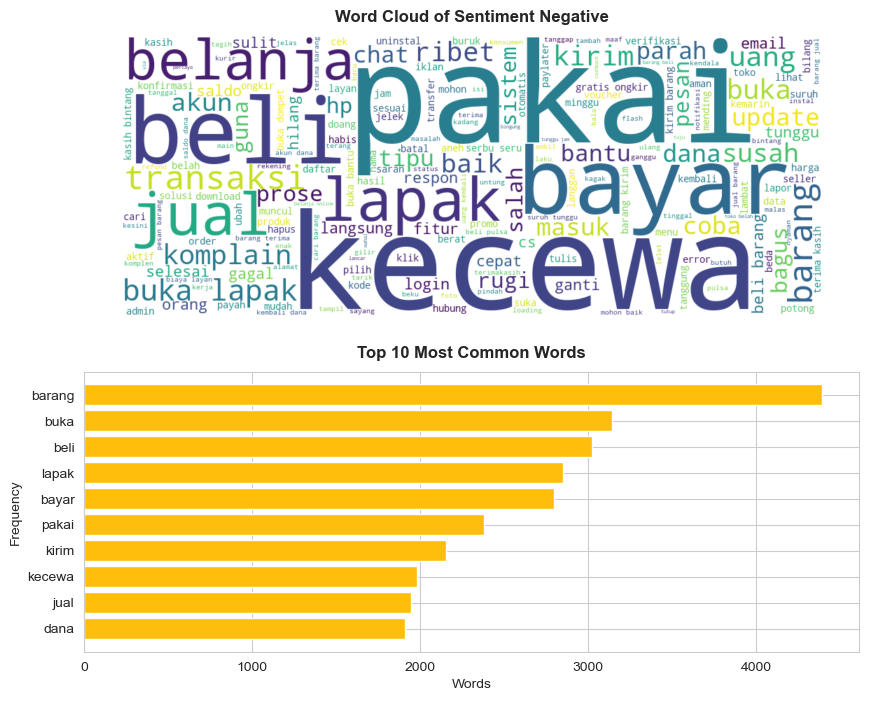

In [44]:
wordclouds('Negative')

**Observation**

It can be seen that for the most negative sentiments that appear in wordclouds are the words "kecewa, bayar, pakai, komplain" and in bar plot are "barang, buka, beli" 

## Modeling

In [45]:
review_data['sentiment'].value_counts()

Positive    16228
Negative    12512
Name: sentiment, dtype: int64

### Scoring Metric

Because the target is imbalance so here for scoring metric using F1 Score because for sentiment analysis, precision and recall are equally important.

**F1 Score** is an evaluation metric that measures the balance between precision and recall in a classification system. F1 Score is typically used in contexts where it is necessary to maintain a balance between precision and recall.

### Encoding Target

In [87]:
review_data['label'] = review_data['sentiment'].map({'Positive': 0, 'Negative': 1})

In [88]:
review_data.head(3)

,user_name,text_reviews,rating_score,create_at,text_clean,text_token,text_stopwords,stemmed_text,sentiment,label
0,E MUAMAR S,Kenapa ribet sekali ingin mengganti alamat sur...,1,2023-11-18,kenapa ribet sekali ingin mengganti alamat sur...,"['kenapa', 'ribet', 'sekali', 'ingin', 'mengga...","['ribet', 'mengganti', 'alamat', 'surel', 'akt...",ribet ganti alamat aktif buka bantu suruh foto...,Negative,1
1,Maulana Malik Ibrahim,"Tolong di perbaiki sistemnya,dari segi pengamb...",5,2023-11-20,tolong di perbaiki sistemnyadari segi pengambi...,"['tolong', 'di', 'perbaiki', 'sistemnyadari', ...","['perbaiki', 'sistemnyadari', 'segi', 'pengamb...",baik segi ambil lapak daftar super otomatis ka...,Positive,0
2,Muhammad Farid,Salah satu Aplikasi e-commerce yang keren untu...,5,2023-11-07,salah satu aplikasi ecommerce yang keren untuk...,"['salah', 'satu', 'aplikasi', 'ecommerce', 'ya...","['salah', 'aplikasi', 'ecommerce', 'keren', 'k...",salah ecommerce keren oke oke pokok accapprove...,Positive,0


### Split Fitur and Target

In [89]:
target = review_data['label'].to_numpy()
fitur = review_data['stemmed_text'].to_numpy()

### Model Train

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer().fit(fitur)
tfidf_text = tfidf_vectorizer.transform(fitur)

#### Split Train and Test

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, target, test_size=.20, random_state=42)

In [92]:
print(f'TF-IDF Training Features Shape: {X_train.shape}')
print(f'TF-IDF Testing Features Shape: {X_test.shape}')

TF-IDF Training Features Shape: (22992, 7681)
TF-IDF Testing Features Shape: (5748, 7681)


In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

def modeltrain(X, y, models, n_splits=5, random_state=None):
    hasil_train = pd.DataFrame()
    
    #buat nampung hasil prediksi dan nantinya digunakan untuk hitung rata-ratanya
    recall_scores = []
    precision_scores = []
    f1_scores = []
    
    #buat nampng hasil dari ROC AUC
    auc_scores = []
    mean_fpr_list = []
    mean_tpr_list = []
    auc_list = []
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    for model in models:
        method_test = str(type(model)).split(".")[-1][:-2]
        print(method_test)
        print("===========================================================")
        
        # Lists to store tpr and fpr for each fold
        mean_tpr = 0.0
        mean_fpr = np.linspace(0, 1, 100)
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            model.fit(X_train, y_train)
            y_pred_test = model.predict(X_test)
            
            print(f'Fold {skf.current_fold + 1}:')
            print(classification_report(y_test, y_pred_test, digits=6), "\n")
            
            cm = confusion_matrix(y_test, y_pred_test)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
            plt.xlabel('Predicted')
            plt.ylabel('Ground Truth')
            plt.title(f'{method_test} Model: Confusion Matrix - Fold {skf.current_fold + 1}')
            plt.show()
            
            # Compute ROC curve for the current fold
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
            mean_tpr += np.interp(mean_fpr, fpr, tpr)
            
            skf.current_fold += 1  # Incrementing the current fold
            
            recall_scores.append(round(recall_score(y_test, y_pred_test), 3))
            precision_scores.append(round(precision_score(y_test, y_pred_test), 3))
            f1_scores.append(round(f1_score(y_test, y_pred_test), 3))
            
            # Compute AUC for the current fold
            auc_scores.append(auc(fpr, tpr))
            
        # Reset the current fold for the next model
        skf.current_fold = 0
        
        # Compute the average ROC curve
        mean_tpr /= n_splits
        mean_auc = auc(mean_fpr, mean_tpr)
        
        # Store mean fpr, tpr, and AUC for each model
        mean_fpr_list.append(mean_fpr)
        mean_tpr_list.append(mean_tpr)
        auc_list.append(mean_auc)

        hasil_train = hasil_train.append({
            'Model': method_test,
            'Precision_Score': np.mean(precision_scores),
            'Recall_Score': np.mean(recall_scores,),
            'F1_Score': np.mean(f1_scores),
            'AUC_score': mean_auc
        }, ignore_index=True)
        
    # Plot ROC curves for all models in a single plot
    plt.figure(figsize=(10, 5))
    for i in range(len(models)):
        plt.plot(mean_fpr_list[i], mean_tpr_list[i], label=f'{str(type(models[i])).split(".")[-1][:-2]} (AUC = {auc_list[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.show()
    
    return hasil_train

#### Evaluation Training Model

LogisticRegression
Fold 1:
              precision    recall  f1-score   support

           0   0.906929  0.847510  0.876213      2610
           1   0.815741  0.885872  0.849361      1989

    accuracy                       0.864101      4599
   macro avg   0.861335  0.866691  0.862787      4599
weighted avg   0.867491  0.864101  0.864600      4599
 



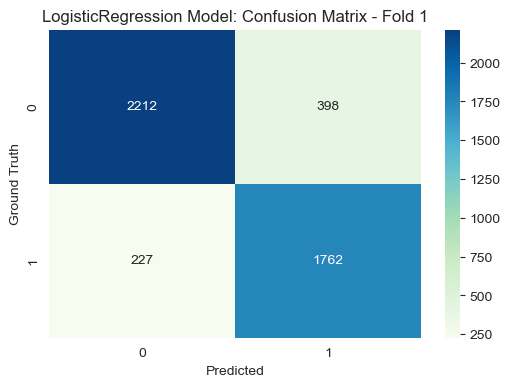

Fold 2:
              precision    recall  f1-score   support

           0   0.911717  0.858621  0.884373      2610
           1   0.827651  0.890900  0.858111      1989

    accuracy                       0.872581      4599
   macro avg   0.869684  0.874760  0.871242      4599
weighted avg   0.875359  0.872581  0.873015      4599
 



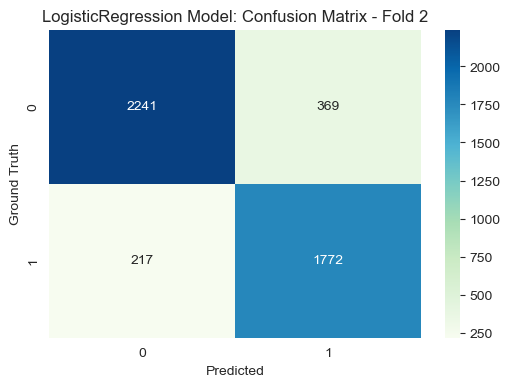

Fold 3:
              precision    recall  f1-score   support

           0   0.906807  0.857800  0.881623      2609
           1   0.825822  0.884364  0.854091      1989

    accuracy                       0.869291      4598
   macro avg   0.866314  0.871082  0.867857      4598
weighted avg   0.871774  0.869291  0.869713      4598
 



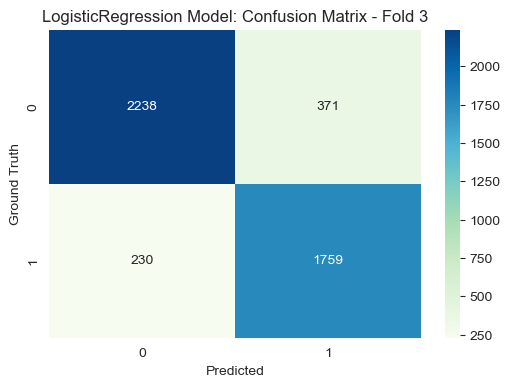

Fold 4:
              precision    recall  f1-score   support

           0   0.900162  0.853584  0.876254      2609
           1   0.820151  0.875817  0.847070      1989

    accuracy                       0.863201      4598
   macro avg   0.860156  0.864700  0.861662      4598
weighted avg   0.865551  0.863201  0.863630      4598
 



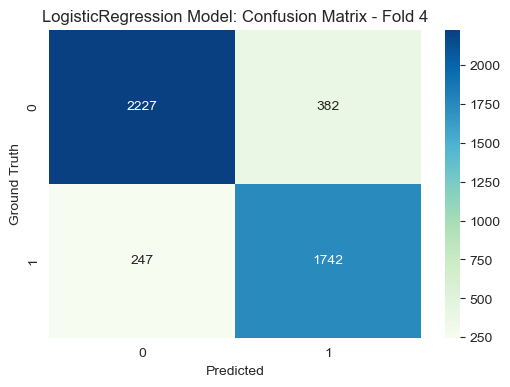

Fold 5:
              precision    recall  f1-score   support

           0   0.899682  0.866232  0.882640      2609
           1   0.832694  0.873303  0.852515      1989

    accuracy                       0.869291      4598
   macro avg   0.866188  0.869768  0.867578      4598
weighted avg   0.870704  0.869291  0.869609      4598
 



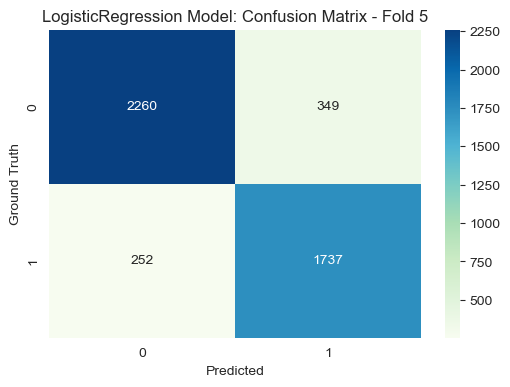

KNeighborsClassifier
Fold 1:
              precision    recall  f1-score   support

           0   0.815642  0.839080  0.827195      2610
           1   0.780564  0.751131  0.765565      1989

    accuracy                       0.801044      4599
   macro avg   0.798103  0.795106  0.796380      4599
weighted avg   0.800472  0.801044  0.800541      4599
 



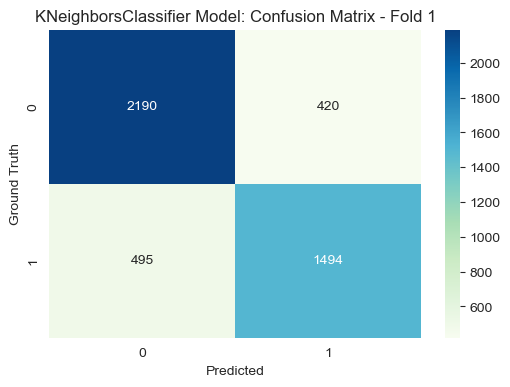

Fold 2:
              precision    recall  f1-score   support

           0   0.824653  0.843295  0.833870      2610
           1   0.788083  0.764706  0.776218      1989

    accuracy                       0.809306      4599
   macro avg   0.806368  0.804000  0.805044      4599
weighted avg   0.808837  0.809306  0.808937      4599
 



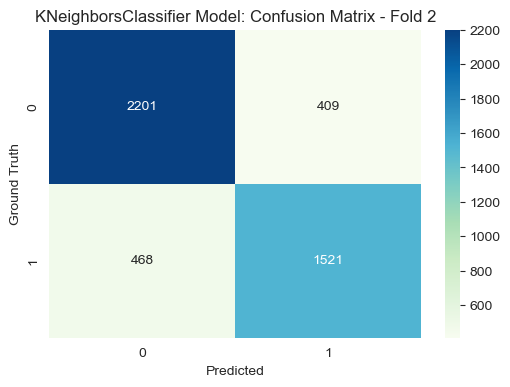

Fold 3:
              precision    recall  f1-score   support

           0   0.827429  0.832503  0.829958      2609
           1   0.778510  0.772247  0.775366      1989

    accuracy                       0.806438      4598
   macro avg   0.802969  0.802375  0.802662      4598
weighted avg   0.806267  0.806438  0.806343      4598
 



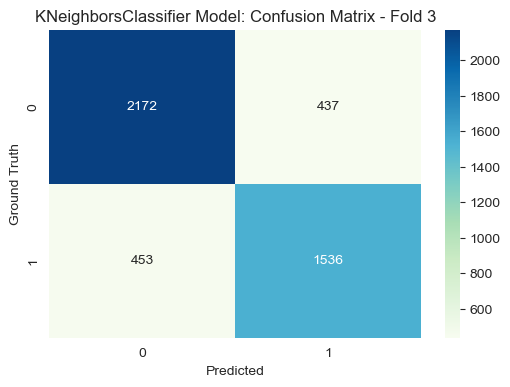

Fold 4:
              precision    recall  f1-score   support

           0   0.811997  0.850901  0.830994      2609
           1   0.791309  0.741579  0.765637      1989

    accuracy                       0.803610      4598
   macro avg   0.801653  0.796240  0.798315      4598
weighted avg   0.803048  0.803610  0.802722      4598
 



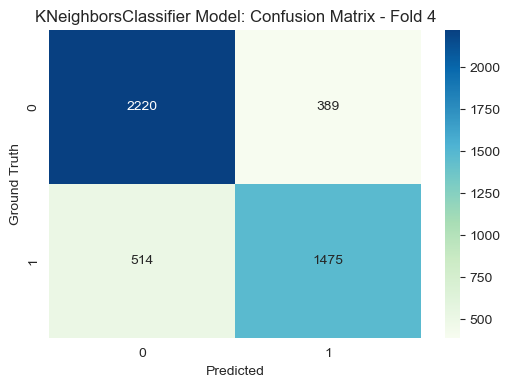

Fold 5:
              precision    recall  f1-score   support

           0   0.819793  0.850901  0.835057      2609
           1   0.794180  0.754651  0.773911      1989

    accuracy                       0.809265      4598
   macro avg   0.806987  0.802776  0.804484      4598
weighted avg   0.808713  0.809265  0.808607      4598
 



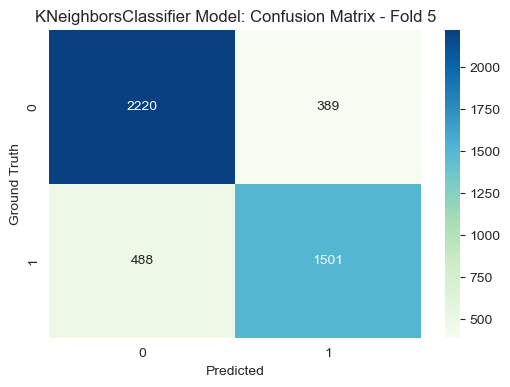

MultinomialNB
Fold 1:
              precision    recall  f1-score   support

           0   0.912621  0.828352  0.868447      2610
           1   0.799103  0.895928  0.844750      1989

    accuracy                       0.857578      4599
   macro avg   0.855862  0.862140  0.856599      4599
weighted avg   0.863526  0.857578  0.858199      4599
 



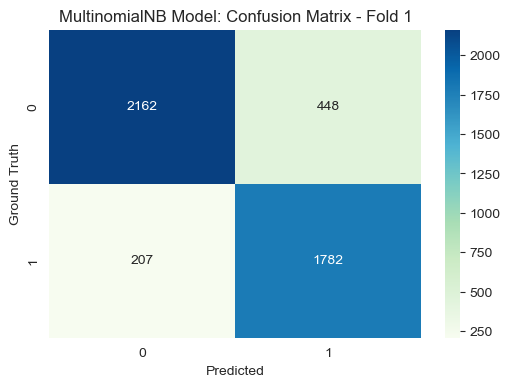

Fold 2:
              precision    recall  f1-score   support

           0   0.920809  0.837548  0.877207      2610
           1   0.809438  0.905480  0.854770      1989

    accuracy                       0.866928      4599
   macro avg   0.865123  0.871514  0.865988      4599
weighted avg   0.872643  0.866928  0.867503      4599
 



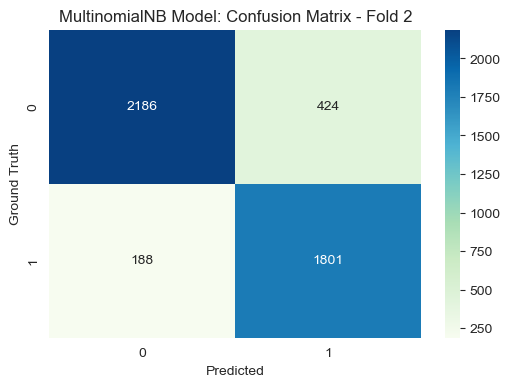

Fold 3:
              precision    recall  f1-score   support

           0   0.916807  0.836336  0.874724      2609
           1   0.807484  0.900452  0.851438      1989

    accuracy                       0.864071      4598
   macro avg   0.862145  0.868394  0.863081      4598
weighted avg   0.869516  0.864071  0.864651      4598
 



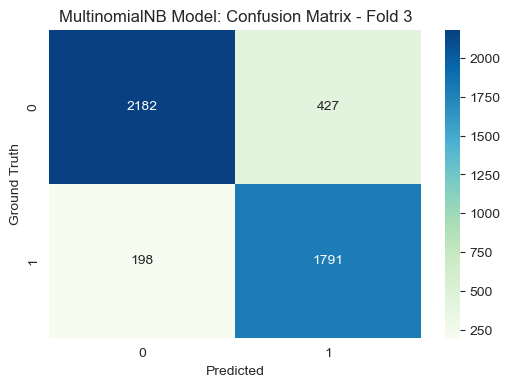

Fold 4:
              precision    recall  f1-score   support

           0   0.913134  0.842085  0.876171      2609
           1   0.812044  0.894922  0.851471      1989

    accuracy                       0.864941      4598
   macro avg   0.862589  0.868504  0.863821      4598
weighted avg   0.869404  0.864941  0.865487      4598
 



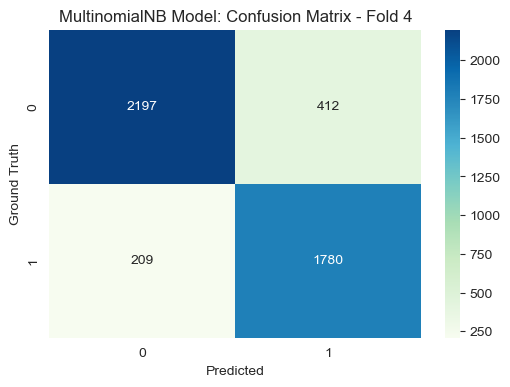

Fold 5:
              precision    recall  f1-score   support

           0   0.909242  0.840935  0.873755      2609
           1   0.810069  0.889894  0.848107      1989

    accuracy                       0.862114      4598
   macro avg   0.859655  0.865415  0.860931      4598
weighted avg   0.866341  0.862114  0.862661      4598
 



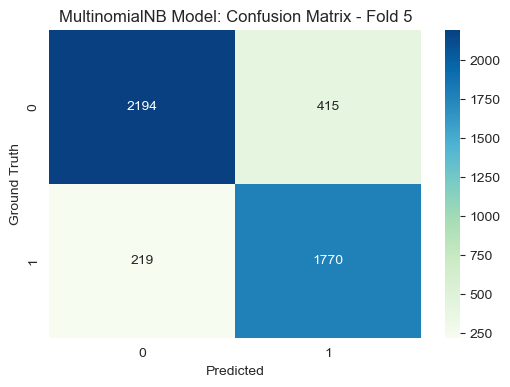

DecisionTreeClassifier
Fold 1:
              precision    recall  f1-score   support

           0   0.807944  0.802682  0.805305      2610
           1   0.743270  0.749623  0.746433      1989

    accuracy                       0.779735      4599
   macro avg   0.775607  0.776152  0.775869      4599
weighted avg   0.779974  0.779735  0.779844      4599
 



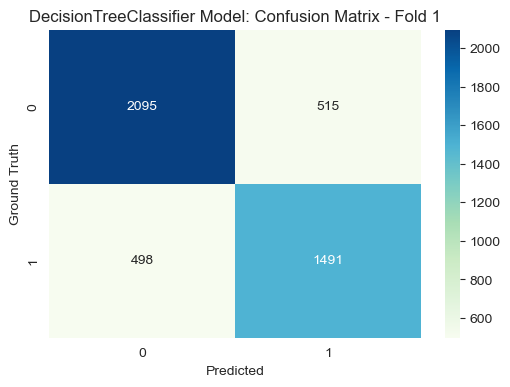

Fold 2:
              precision    recall  f1-score   support

           0   0.819578  0.818008  0.818792      2610
           1   0.761785  0.763700  0.762742      1989

    accuracy                       0.794521      4599
   macro avg   0.790682  0.790854  0.790767      4599
weighted avg   0.794583  0.794521  0.794551      4599
 



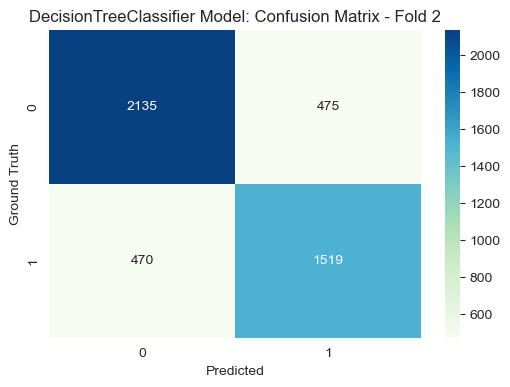

Fold 3:
              precision    recall  f1-score   support

           0   0.812428  0.806823  0.809615      2609
           1   0.748879  0.755656  0.752252      1989

    accuracy                       0.784689      4598
   macro avg   0.780653  0.781239  0.780934      4598
weighted avg   0.784938  0.784689  0.784801      4598
 



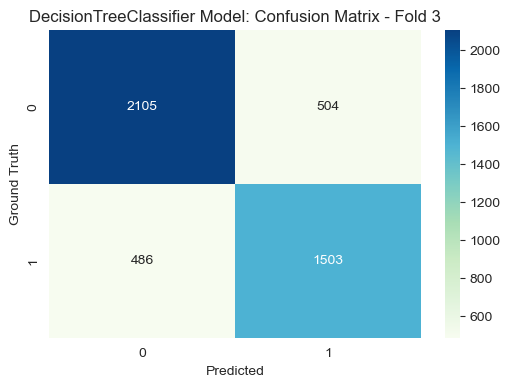

Fold 4:
              precision    recall  f1-score   support

           0   0.813936  0.814872  0.814403      2609
           1   0.756798  0.755656  0.756226      1989

    accuracy                       0.789256      4598
   macro avg   0.785367  0.785264  0.785315      4598
weighted avg   0.789219  0.789256  0.789237      4598
 



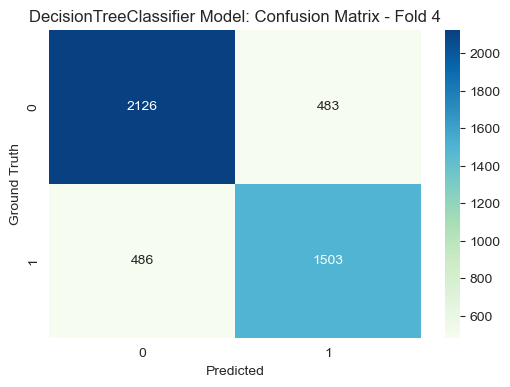

Fold 5:
              precision    recall  f1-score   support

           0   0.815222  0.825220  0.820190      2609
           1   0.766990  0.754651  0.760770      1989

    accuracy                       0.794693      4598
   macro avg   0.791106  0.789935  0.790480      4598
weighted avg   0.794358  0.794693  0.794487      4598
 



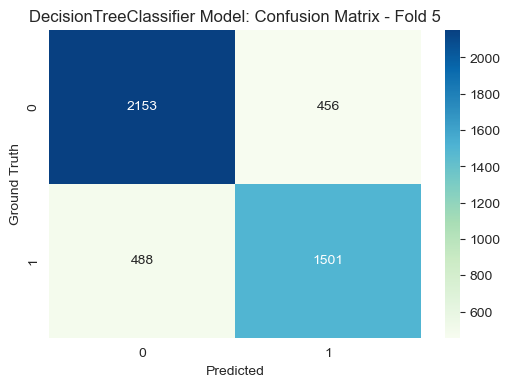

RandomForestClassifier
Fold 1:
              precision    recall  f1-score   support

           0   0.904918  0.845977  0.874455      2610
           1   0.813803  0.883358  0.847155      1989

    accuracy                       0.862144      4599
   macro avg   0.859360  0.864668  0.860805      4599
weighted avg   0.865512  0.862144  0.862649      4599
 



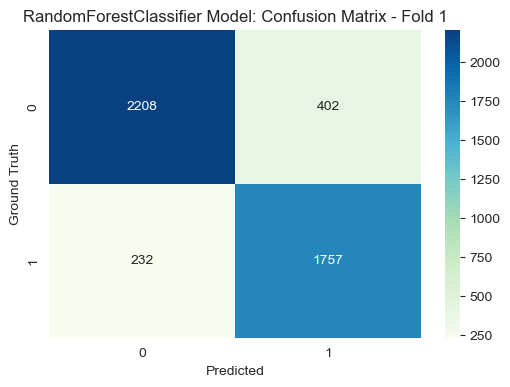

Fold 2:
              precision    recall  f1-score   support

           0   0.901144  0.845211  0.872282      2610
           1   0.812180  0.878331  0.843961      1989

    accuracy                       0.859535      4599
   macro avg   0.856662  0.861771  0.858121      4599
weighted avg   0.862668  0.859535  0.860033      4599
 



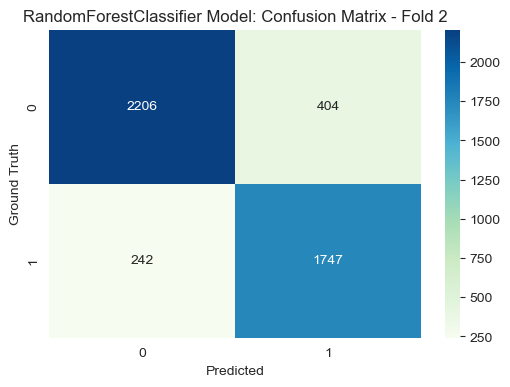

Fold 3:
              precision    recall  f1-score   support

           0   0.903397  0.845918  0.873713      2609
           1   0.813457  0.881347  0.846042      1989

    accuracy                       0.861244      4598
   macro avg   0.858427  0.863633  0.859878      4598
weighted avg   0.864491  0.861244  0.861744      4598
 



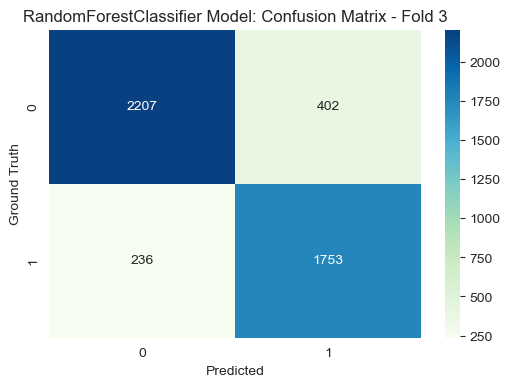

Fold 4:
              precision    recall  f1-score   support

           0   0.891148  0.856650  0.873559      2609
           1   0.821053  0.862745  0.841383      1989

    accuracy                       0.859287      4598
   macro avg   0.856100  0.859698  0.857471      4598
weighted avg   0.860826  0.859287  0.859640      4598
 



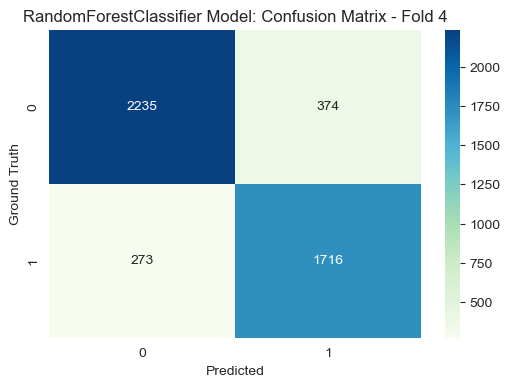

Fold 5:
              precision    recall  f1-score   support

           0   0.896373  0.862016  0.878859      2609
           1   0.827669  0.869281  0.847965      1989

    accuracy                       0.865159      4598
   macro avg   0.862021  0.865649  0.863412      4598
weighted avg   0.866653  0.865159  0.865495      4598
 



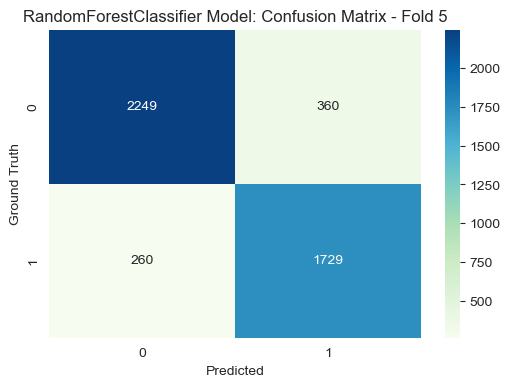

LGBMClassifier
[LightGBM] [Info] Number of positive: 7956, number of negative: 10437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46648
[LightGBM] [Info] Number of data points in the train set: 18393, number of used features: 927
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432556 -> initscore=-0.271431
[LightGBM] [Info] Start training from score -0.271431
Fold 1:
              precision    recall  f1-score   support

           0   0.894907  0.848276  0.870968      2610
           1   0.813647  0.869281  0.840544      1989

    accuracy                       0.857360      4599
   macro avg   0.854277  0.858778  0.855756      4599
weighted avg   0.859763  0.857360  0.857810      4599
 



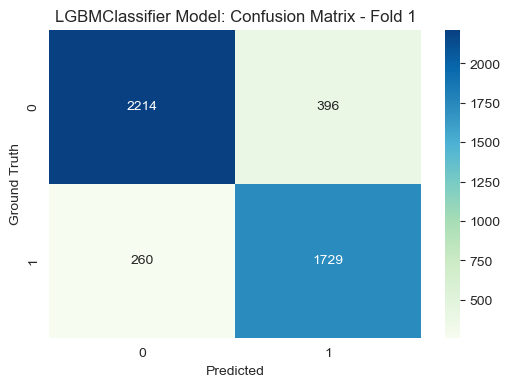

[LightGBM] [Info] Number of positive: 7956, number of negative: 10437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46594
[LightGBM] [Info] Number of data points in the train set: 18393, number of used features: 924
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432556 -> initscore=-0.271431
[LightGBM] [Info] Start training from score -0.271431
Fold 2:
              precision    recall  f1-score   support

           0   0.890171  0.857088  0.873316      2610
           1   0.821189  0.861237  0.840736      1989

    accuracy                       0.858882      4599
   macro avg   0.855680  0.859162  0.857026      4599
weighted avg   0.860337  0.858882  0.859226      4599
 



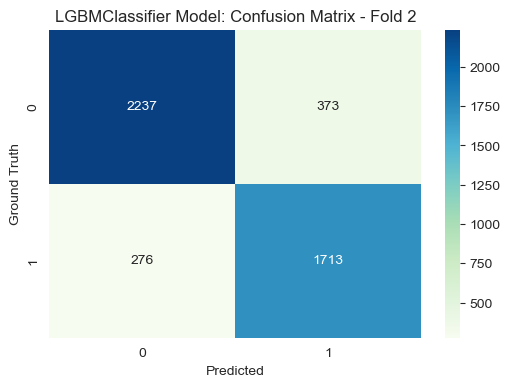

[LightGBM] [Info] Number of positive: 7956, number of negative: 10438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46592
[LightGBM] [Info] Number of data points in the train set: 18394, number of used features: 922
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432532 -> initscore=-0.271527
[LightGBM] [Info] Start training from score -0.271527
Fold 3:
              precision    recall  f1-score   support

           0   0.891935  0.847834  0.869326      2609
           1   0.812559  0.865259  0.838081      1989

    accuracy                       0.855372      4598
   macro avg   0.852247  0.856547  0.853704      4598
weighted avg   0.857599  0.855372  0.855810      4598
 



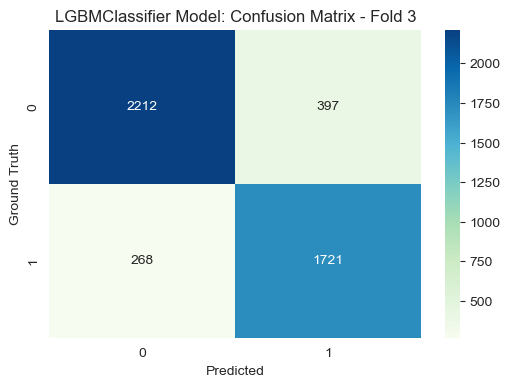

[LightGBM] [Info] Number of positive: 7956, number of negative: 10438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46567
[LightGBM] [Info] Number of data points in the train set: 18394, number of used features: 919
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432532 -> initscore=-0.271527
[LightGBM] [Info] Start training from score -0.271527
Fold 4:
              precision    recall  f1-score   support

           0   0.886031  0.858183  0.871885      2609
           1   0.821342  0.855204  0.837931      1989

    accuracy                       0.856894      4598
   macro avg   0.853687  0.856693  0.854908      4598
weighted avg   0.858048  0.856894  0.857197      4598
 



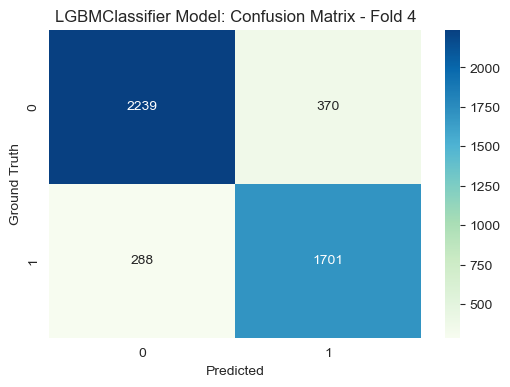

[LightGBM] [Info] Number of positive: 7956, number of negative: 10438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46688
[LightGBM] [Info] Number of data points in the train set: 18394, number of used features: 924
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432532 -> initscore=-0.271527
[LightGBM] [Info] Start training from score -0.271527
Fold 5:
              precision    recall  f1-score   support

           0   0.889110  0.857417  0.872976      2609
           1   0.821326  0.859729  0.840088      1989

    accuracy                       0.858417      4598
   macro avg   0.855218  0.858573  0.856532      4598
weighted avg   0.859788  0.858417  0.858749      4598
 



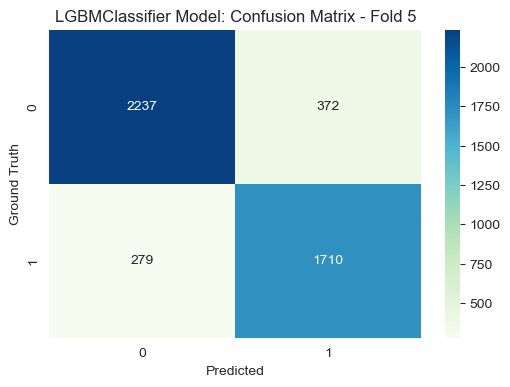

XGBClassifier
Fold 1:
              precision    recall  f1-score   support

           0   0.901775  0.837165  0.868269      2610
           1   0.804688  0.880342  0.840816      1989

    accuracy                       0.855838      4599
   macro avg   0.853231  0.858753  0.854543      4599
weighted avg   0.859786  0.855838  0.856396      4599
 



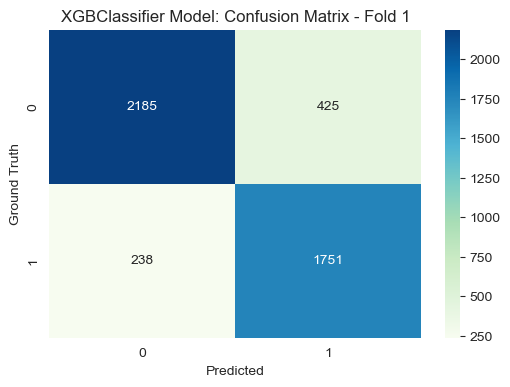

Fold 2:
              precision    recall  f1-score   support

           0   0.900534  0.839464  0.868927      2610
           1   0.806556  0.878331  0.840915      1989

    accuracy                       0.856273      4599
   macro avg   0.853545  0.858897  0.854921      4599
weighted avg   0.859890  0.856273  0.856812      4599
 



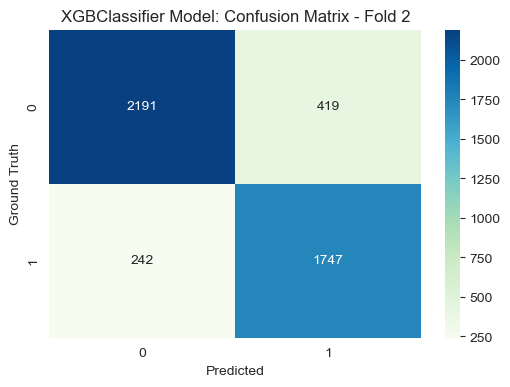

Fold 3:
              precision    recall  f1-score   support

           0   0.899545  0.834036  0.865553      2609
           1   0.801285  0.877828  0.837812      1989

    accuracy                       0.852980      4598
   macro avg   0.850415  0.855932  0.851682      4598
weighted avg   0.857040  0.852980  0.853553      4598
 



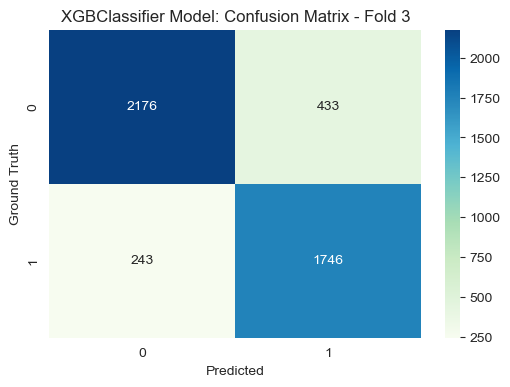

Fold 4:
              precision    recall  f1-score   support

           0   0.891190  0.841319  0.865536      2609
           1   0.806089  0.865259  0.834627      1989

    accuracy                       0.851675      4598
   macro avg   0.848639  0.853289  0.850081      4598
weighted avg   0.854377  0.851675  0.852165      4598
 



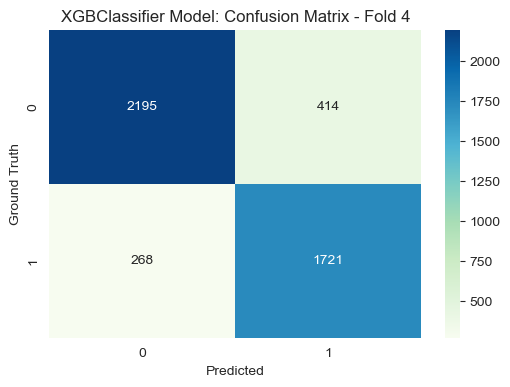

Fold 5:
              precision    recall  f1-score   support

           0   0.895775  0.853200  0.873969      2609
           1   0.818741  0.869784  0.843491      1989

    accuracy                       0.860374      4598
   macro avg   0.857258  0.861492  0.858730      4598
weighted avg   0.862452  0.860374  0.860785      4598
 



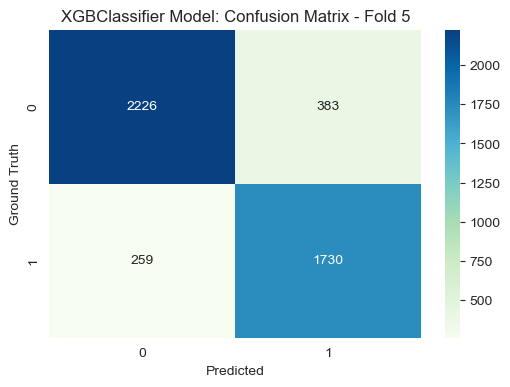

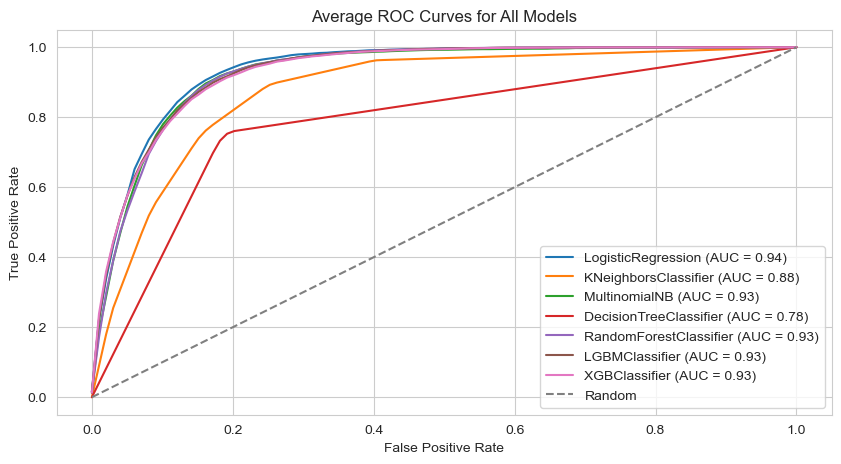

In [94]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

models = [LogisticRegression(random_state=42),
          KNeighborsClassifier(),
          MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

# Add a current_fold attribute to StratifiedKFold for tracking the current fold
StratifiedKFold.current_fold = 0


hasil_train = modeltrain(X_train, y_train, models, n_splits=5, random_state=42)

In [95]:
hasil_train

,Model,Precision_Score,Recall_Score,F1_Score,AUC_score
0,LogisticRegression,0.824600,0.882000,0.852200,0.935444
1,KNeighborsClassifier,0.805600,0.819500,0.811800,0.877027
2,MultinomialNB,0.806200,0.845400,0.824533,0.928266
3,DecisionTreeClassifier,0.793550,0.823100,0.807300,0.784658
4,RandomForestClassifier,0.798360,0.833440,0.814880,0.928250
5,LGBMClassifier,0.801633,0.838200,0.819000,0.930862
6,XGBClassifier,0.802486,0.843343,0.821943,0.929543


**Observation**

After evaluating the training data, it can be seen that all models have good precision, recall and F1 score so that it can be concluded that the model is not **underfitting**. It can also be seen that the AUC ROC Score has a value above 0.80 except the **Decision Tree** model.

#### Evaluation Testing Model

In [96]:
def modeltest(X_train, y_train, X_test, y_test, models):
    hasil_test = pd.DataFrame()
    
    #buat nampng hasil dari ROC AUC
    auc_scores = []
    fpr_list = []
    tpr_list = []
    auc_list = []
    
    for model in models:
        
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        method_test = str(type(model)).split(".")[-1][:-2]
        print(method_test)
        print("="*50)
        print(classification_report(y_test,y_pred_test, digits=6),"\n")
        
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f'{method_test} Model: Confusion Matrix')
        plt.show()
        
        recall = recall_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        f1_scores = f1_score(y_test, y_pred_test)
        
        # Calculate ROC AUC score
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        # Compute ROC curve for the current fold
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        
        # Compute ROC curve for the current model
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        
        # Store fpr, tpr, and AUC for each model
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        auc_list.append(roc_auc)

        hasil_test = hasil_test.append({
        'Model' : method_test,
        'Precision_Score' : precision,
        'Recall_Score' : recall,
        'F1_Score' : f1_scores,
        'ROC_AUC_Score': roc_auc
        }, ignore_index=True)
        
    # Plot ROC curves for all models in a single plot
    plt.figure(figsize=(10, 5))
    for i in range(len(models)):
        plt.plot(fpr_list[i], tpr_list[i], label=f'{str(type(models[i])).split(".")[-1][:-2]} (AUC = {auc_list[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for All Models')
    plt.legend(loc='lower right')
    plt.show()
    
    return hasil_test

LogisticRegression
              precision    recall  f1-score   support

           0   0.896530  0.877083  0.886700      3181
           1   0.851669  0.874562  0.862964      2567

    accuracy                       0.875957      5748
   macro avg   0.874099  0.875822  0.874832      5748
weighted avg   0.876495  0.875957  0.876099      5748
 



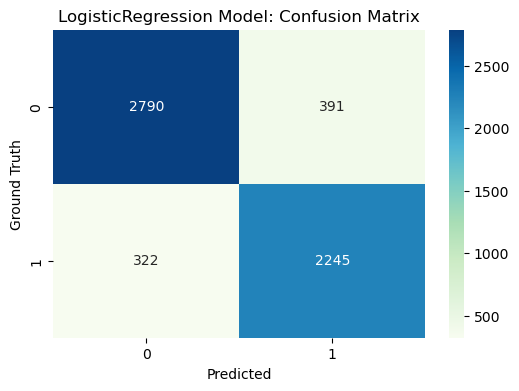

KNeighborsClassifier
              precision    recall  f1-score   support

           0   0.814239  0.855706  0.834457      3181
           1   0.809148  0.758083  0.782784      2567

    accuracy                       0.812109      5748
   macro avg   0.811693  0.806895  0.808620      5748
weighted avg   0.811965  0.812109  0.811380      5748
 



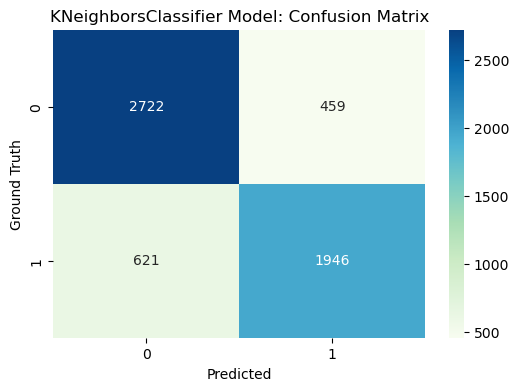

MultinomialNB
              precision    recall  f1-score   support

           0   0.911342  0.856334  0.882982      3181
           1   0.834360  0.896767  0.864439      2567

    accuracy                       0.874391      5748
   macro avg   0.872851  0.876551  0.873710      5748
weighted avg   0.876962  0.874391  0.874701      5748
 



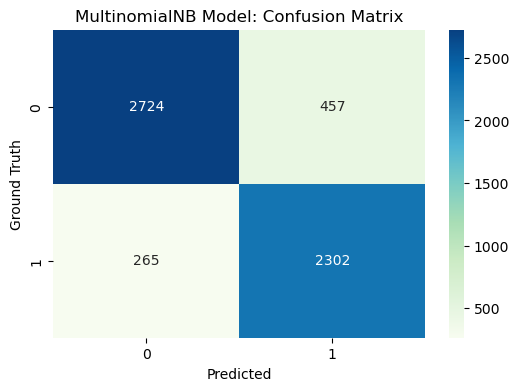

DecisionTreeClassifier
              precision    recall  f1-score   support

           0   0.813341  0.835586  0.824314      3181
           1   0.789113  0.762369  0.775510      2567

    accuracy                       0.802888      5748
   macro avg   0.801227  0.798977  0.799912      5748
weighted avg   0.802521  0.802888  0.802519      5748
 



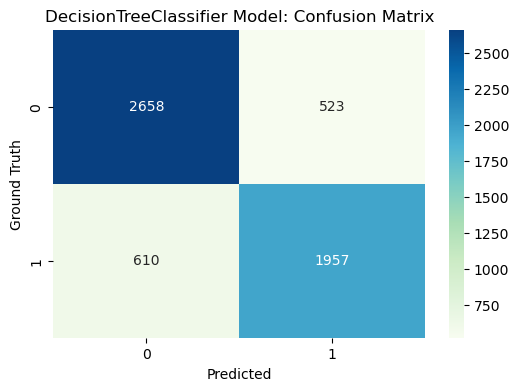

RandomForestClassifier
              precision    recall  f1-score   support

           0   0.893541  0.865451  0.879272      3181
           1   0.839520  0.872224  0.855560      2567

    accuracy                       0.868476      5748
   macro avg   0.866531  0.868838  0.867416      5748
weighted avg   0.869416  0.868476  0.868682      5748
 



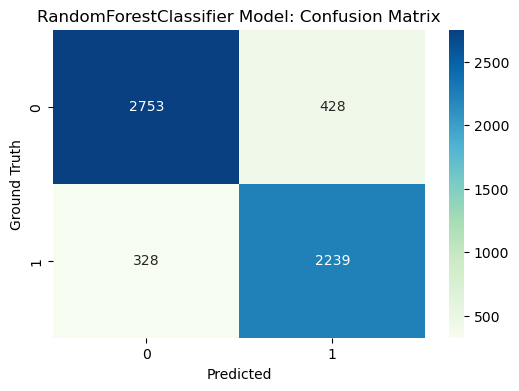

[LightGBM] [Info] Number of positive: 9945, number of negative: 13047
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55385
[LightGBM] [Info] Number of data points in the train set: 22992, number of used features: 1031
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432542 -> initscore=-0.271488
[LightGBM] [Info] Start training from score -0.271488
LGBMClassifier
              precision    recall  f1-score   support

           0   0.886696  0.875825  0.881227      3181
           1   0.848427  0.861317  0.854823      2567

    accuracy                       0.869346      5748
   macro avg   0.867562  0.868571  0.868025      5748
weighted avg   0.869606  0.869346  0.869435      5748
 



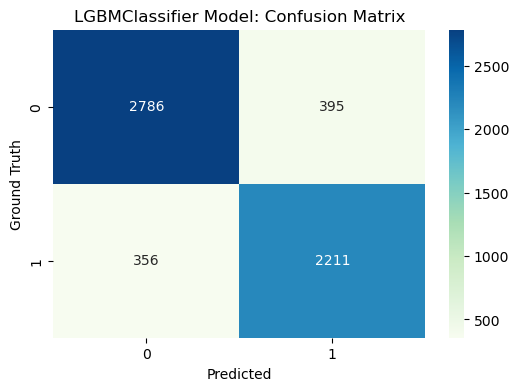

XGBClassifier
              precision    recall  f1-score   support

           0   0.898461  0.862307  0.880013      3181
           1   0.837477  0.879236  0.857849      2567

    accuracy                       0.869868      5748
   macro avg   0.867969  0.870772  0.868931      5748
weighted avg   0.871226  0.869868  0.870115      5748
 



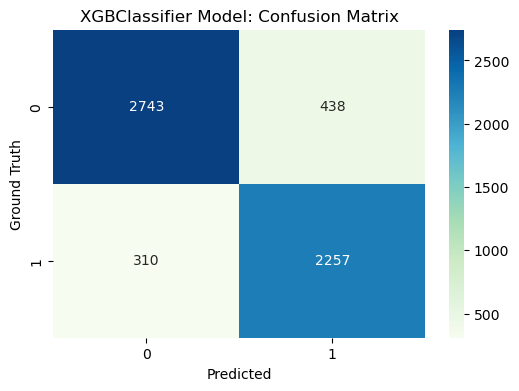

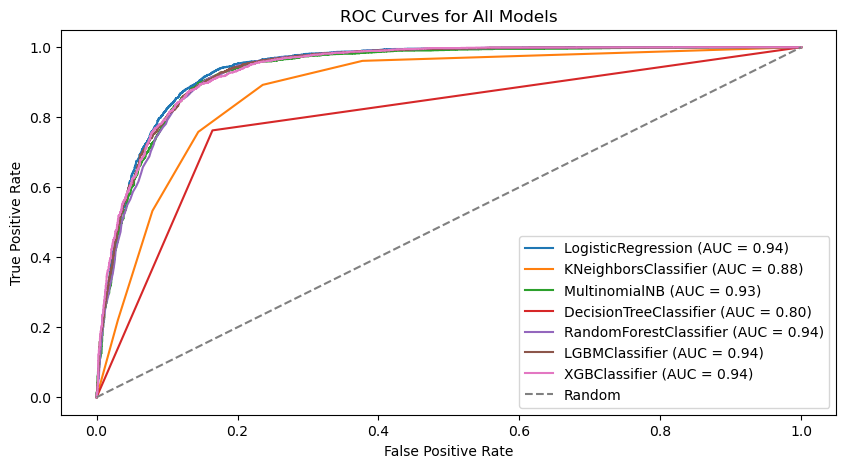

In [38]:
models = [LogisticRegression(random_state=42),
          KNeighborsClassifier(),
          MultinomialNB(),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          LGBMClassifier(random_state=42),
          XGBClassifier(random_state=42)]

hasil_test = modeltest(X_train, y_train, X_test, y_test, models)

In [97]:
hasil_test

,Model,Precision_Score,Recall_Score,F1_Score,ROC_AUC_Score
0,LogisticRegression,0.851669,0.874562,0.862964,0.941951
1,KNeighborsClassifier,0.809148,0.758083,0.782784,0.881016
2,MultinomialNB,0.834360,0.896767,0.864439,0.934785
3,DecisionTreeClassifier,0.789113,0.762369,0.775510,0.798977
4,RandomForestClassifier,0.839520,0.872224,0.855560,0.935514
5,LGBMClassifier,0.848427,0.861317,0.854823,0.938756
6,XGBClassifier,0.837477,0.879236,0.857849,0.939223


#### Comparison of Training and Testing Models

In [98]:
hasil_banding = hasil_train.merge(hasil_test, on='Model', suffixes=('_train','_test'))
hasil_banding_precision = hasil_banding[['Model','F1_Score_train','F1_Score_test']]
hasil_banding_precision['performance'] = np.where(hasil_banding_precision['F1_Score_train'] >= hasil_banding_precision['F1_Score_test'],'Overfitting', 'Good')
hasil_banding_precision

,Model,F1_Score_train,F1_Score_test,performance
0,LogisticRegression,0.852200,0.862964,Good
1,KNeighborsClassifier,0.811800,0.782784,Overfitting
2,MultinomialNB,0.824533,0.864439,Good
3,DecisionTreeClassifier,0.807300,0.775510,Overfitting
4,RandomForestClassifier,0.814880,0.855560,Good
5,LGBMClassifier,0.819000,0.854823,Good
6,XGBClassifier,0.821943,0.857849,Good


**Observation**

It can be seen that almost all models perform better when evaluated using test data, except for the **Decision Tree and KNN** model, which has decreased in performance when performed with test data, resulting in **(Overfitting)**. Furthermore, the 3 best evaluated models were selected to be subjected to Hyperparameter Tuning in the hope of better performance. The selected models are **Logistic Regression, MultinomialNB and XGBClassifier**.

## Hyperparameter Tuning

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline

import time

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=.20, random_state=42)

def model_hyperparameter(model, parameter, X_train, y_train, X_test, y_test):
    method_test = str(type(model)).split(".")[-1][:-2]  # for the name of the model
    start_time = time.time()

    # Creating a pipeline with TF-IDF and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Combining parameters for both TF-IDF and the model
    parameters = parameter

    # Train Model
    model_hyper_randomcv = GridSearchCV(pipeline, parameters, cv=5, scoring='f1', n_jobs=-1)
    model_hyper_randomcv.fit(X_train, y_train)

    end_time = time.time()
    execution_time = end_time - start_time

    # Show best estimator
    cv_result = pd.DataFrame(model_hyper_randomcv.cv_results_)
    retain_cols = ['params', 'mean_test_score', 'rank_test_score']
    display(cv_result[retain_cols].sort_values('rank_test_score').head())

    print(f'Best Estimator {(method_test)}: {model_hyper_randomcv.best_params_}')

    # Show Confusion Matrix
    fig, ax = plt.subplots(figsize=(6, 4))
    y_pred = model_hyper_randomcv.best_estimator_.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=model_hyper_randomcv.best_estimator_.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model_hyper_randomcv.best_estimator_.classes_)
    disp.plot(ax=ax)
    plt.title(f'{method_test} : ConfusionMatrix')
    plt.show()

    # Calculate ROC AUC score
    y_pred_proba = model_hyper_randomcv.best_estimator_.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{method_test} Model: ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Classification report
    y_preds = model_hyper_randomcv.best_estimator_.predict(X_test)
    print(f'Classification Report : {method_test}')
    print('#' * 60)
    print(classification_report(y_test, y_preds, digits=4))

    return y_preds, execution_time, fpr, tpr, roc_auc


### Logistic Regression

,params,mean_test_score,rank_test_score
355,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.857063,1
343,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.857021,2
349,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.856979,3
337,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.856979,3
331,"{'model__C': 1, 'model__penalty': 'l2', 'model...",0.856979,3


Best Estimator LogisticRegression: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}


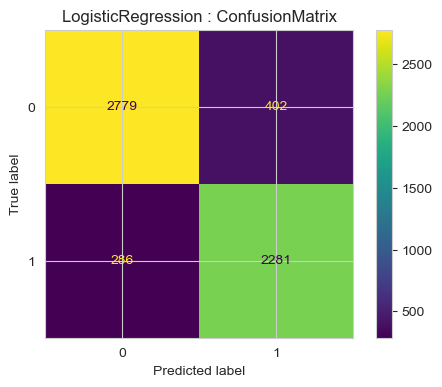

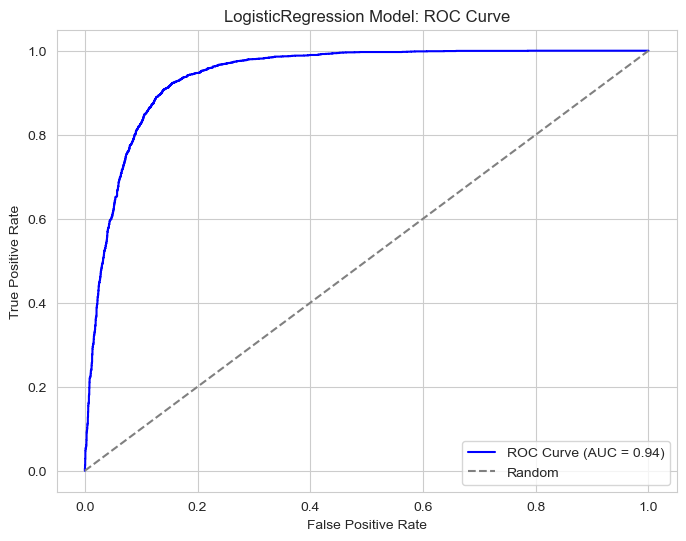

Classification Report : LogisticRegression
############################################################
              precision    recall  f1-score   support

           0     0.9067    0.8736    0.8898      3181
           1     0.8502    0.8886    0.8690      2567

    accuracy                         0.8803      5748
   macro avg     0.8784    0.8811    0.8794      5748
weighted avg     0.8814    0.8803    0.8805      5748



In [145]:
parameter = {
        'tfidf__max_features': [None, 500, 1000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': [None, 'l1', 'l2'],
        'model__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    }


y_preds, execution_time, fpr, tpr, roc_auc = model_hyperparameter(LogisticRegression(random_state=42), parameter, X_train, y_train, X_test, y_test)

In [146]:
y_preds_logreg = y_preds
exec_time_logreg = execution_time
fpr_logreg = fpr
tpr_logreg = tpr
roc_auc_logreg = roc_auc

### Multinomial Naive Bayes

,params,mean_test_score,rank_test_score
139,"{'model__alpha': 1, 'model__fit_prior': False,...",0.853360,1
151,"{'model__alpha': 2, 'model__fit_prior': False,...",0.851646,2
162,"{'model__alpha': 3, 'model__fit_prior': False,...",0.850292,3
186,"{'model__alpha': 5, 'model__fit_prior': False,...",0.850131,4
198,"{'model__alpha': 6, 'model__fit_prior': False,...",0.849966,5


Best Estimator MultinomialNB: {'model__alpha': 1, 'model__fit_prior': False, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}


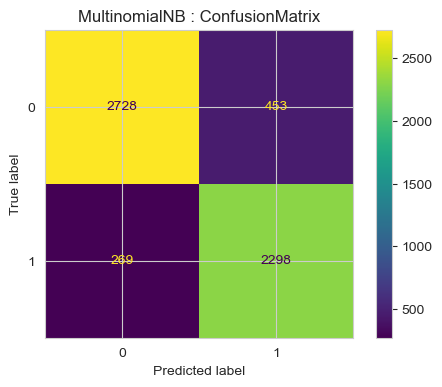

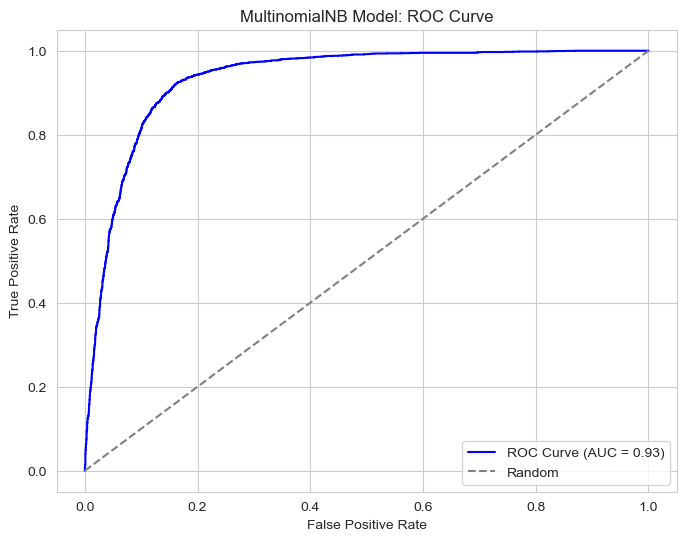

Classification Report : MultinomialNB
############################################################
              precision    recall  f1-score   support

           0     0.9102    0.8576    0.8831      3181
           1     0.8353    0.8952    0.8642      2567

    accuracy                         0.8744      5748
   macro avg     0.8728    0.8764    0.8737      5748
weighted avg     0.8768    0.8744    0.8747      5748



In [147]:
parameter = {
    'tfidf__max_features': [None, 500, 1000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__alpha': range(-10,10),
    'model__fit_prior': [True, False]
    }

y_preds, execution_time, fpr, tpr, roc_auc = model_hyperparameter(MultinomialNB(), parameter, X_train, y_train, X_test, y_test)

In [148]:
y_preds_mnb = y_preds
exec_time_mnb = execution_time
fpr_mnb = fpr
tpr_mnb = tpr
roc_auc_mnb = roc_auc

### XGB Classifier

[LightGBM] [Info] Number of positive: 9945, number of negative: 13047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 55386
[LightGBM] [Info] Number of data points in the train set: 22992, number of used features: 1031
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432542 -> initscore=-0.271488
[LightGBM] [Info] Start training from score -0.271488


,params,mean_test_score,rank_test_score
408,"{'model__learning_rate': 0.1, 'model__min_chil...",0.844545,1
348,"{'model__learning_rate': 0.1, 'model__min_chil...",0.844366,2
318,"{'model__learning_rate': 0.1, 'model__min_chil...",0.844366,2
378,"{'model__learning_rate': 0.1, 'model__min_chil...",0.844366,2
114,"{'model__learning_rate': 0.05, 'model__min_chi...",0.844293,5


Best Estimator LGBMClassifier: {'model__learning_rate': 0.1, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 1)}


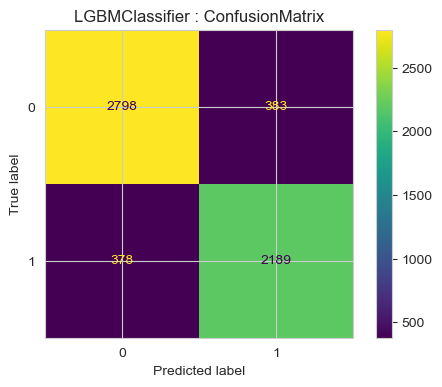

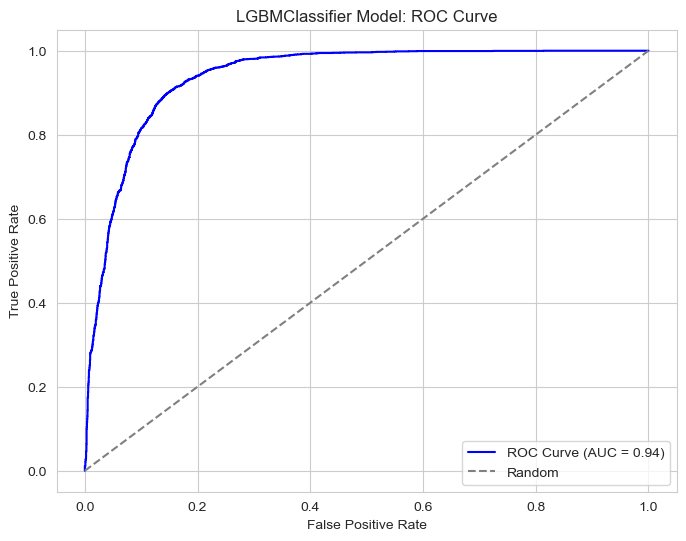

Classification Report : LGBMClassifier
############################################################
              precision    recall  f1-score   support

           0     0.8810    0.8796    0.8803      3181
           1     0.8511    0.8527    0.8519      2567

    accuracy                         0.8676      5748
   macro avg     0.8660    0.8662    0.8661      5748
weighted avg     0.8676    0.8676    0.8676      5748



In [150]:
parameter = {
    'tfidf__max_features': [None, 500, 1000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'model__learning_rate': [0.05, 0.01, 0.1, 0.5],
    'model__n_estimators': [10,50, 100, 200, 300,],
    'model__min_child_weight' : [1e-3, 1e-2, 1e-1, 1, 10]
    }


y_preds, execution_time, fpr, tpr, roc_auc = model_hyperparameter(LGBMClassifier(random_state=42), parameter, X_train, y_train, X_test, y_test)

In [151]:
y_preds_XGB = y_preds
exec_time_XGB = execution_time
fpr_XGB = fpr
tpr_XGB = tpr
roc_auc_XGB = roc_auc

### Evaluation Hyperparameter Tuning

,Model,Precision_Score,Recall_Score,F1_Score,ROC_AUC_Score,Training_Time
0,LogisticRegression,0.850168,0.888586,0.868952,0.941922,608.903595
1,MultinomialNB,0.835333,0.895208,0.864235,0.934770,75.645875
2,XGBClassifier,0.851089,0.852746,0.851917,0.939306,2999.037799


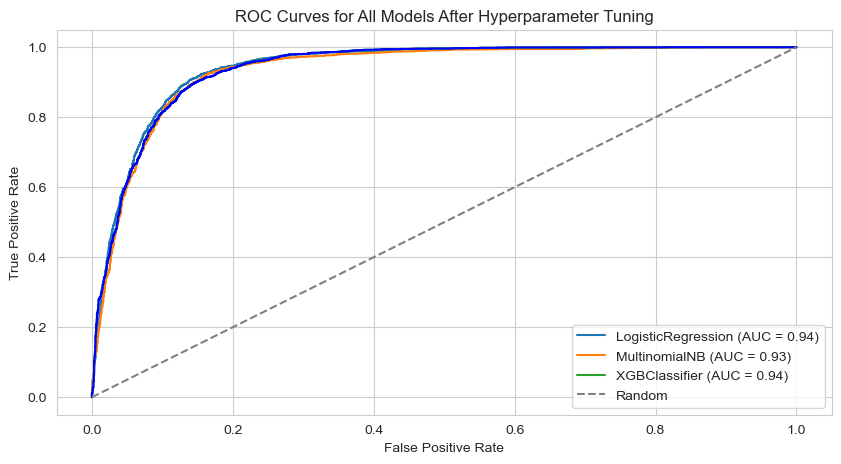

In [152]:
y_preds_hyper = [y_preds_logreg,y_preds_mnb, y_preds_XGB]
times = [exec_time_logreg, exec_time_mnb, exec_time_XGB]
models = ['LogisticRegression', 'MultinomialNB', 'XGBClassifier']
roc_auc_list = [roc_auc_logreg, roc_auc_mnb, roc_auc_XGB]
fpr_list2 = [fpr_logreg, fpr_mnb, fpr_XGB]
tpr_list2 = [tpr_logreg, tpr_mnb, tpr_XGB]


hasil_hyperparameter = pd.DataFrame(columns= ['Model','Precision_Score','Recall_Score','F1_Score', 'ROC_AUC_Score', 'Training_Time'])

for model, time, roc_auc, preds in zip(models,times, roc_auc_list, y_preds_hyper):
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1_scores = f1_score(y_test, preds)
    
    hasil_hyperparameter = hasil_hyperparameter.append({
        'Model' : model,
        'Precision_Score' : precision,
        'Recall_Score' : recall,
        'F1_Score' : f1_scores,
        'ROC_AUC_Score': roc_auc,
        'Training_Time' : time
        }, ignore_index=True)
    
display(hasil_hyperparameter)

plt.figure(figsize=(10, 5))

for i in range(len(models)):
    plt.plot(fpr_list2[i], tpr_list2[i], label=f'{models[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot(fpr, tpr, color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models After Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.show()

### Comparison of Baseline Model and Hyperparameter Tuning Model

In [236]:
hasil_base_hp = hasil_test.merge(hasil_hyperparameter, on='Model', suffixes=('_base','_HP'))
hasil_banding_base_hp = hasil_base_hp[['Model','F1_Score_base','F1_Score_HP','Precision_Score_base','Precision_Score_HP','Recall_Score_base','Recall_Score_HP']]
hasil_banding_base_hp['F1_Difference'] = hasil_base_hp['F1_Score_HP'] - hasil_base_hp['F1_Score_base']
hasil_banding_base_hp['Precision_Difference'] = hasil_base_hp['Precision_Score_HP'] - hasil_base_hp['Precision_Score_base']
hasil_banding_base_hp['Recall_Difference'] = hasil_base_hp['Recall_Score_HP'] - hasil_base_hp['Recall_Score_base']

#### Comparison of  Baseline and Hyperparameter Tuning

In [276]:
f1_column = ['Model','F1_Score_base','F1_Score_HP','F1_Difference']
hasil_banding_base_hp[f1_column]

,Model,F1_Score_base,F1_Score_HP,F1_Difference
0,LogisticRegression,0.862964,0.868952,0.005989
1,MultinomialNB,0.864439,0.864235,-0.000204
2,XGBClassifier,0.857849,0.851917,-0.005932


**Observation**

- It can be seen that for Logistic Regression after Hyperparameter Tuning the value of F1 Score has increased
- While for Multinomial Naive Bayes and XGB Classifier experienced a slight decrease in F1 Score

In [278]:
precision_column = ['Model','Precision_Score_base','Precision_Score_HP','Precision_Difference']
hasil_banding_base_hp[precision_column]

,Model,Precision_Score_base,Precision_Score_HP,Precision_Difference
0,LogisticRegression,0.851669,0.850168,-0.001501
1,MultinomialNB,0.834360,0.835333,0.000972
2,XGBClassifier,0.837477,0.851089,0.013612


**Observation**

- It can be seen that for MultinomialNB and XGBClassifier after Hyperparameter Tuning the value of Precision Score has increased
- While for LogisticRegression performance a slight decrease in Precision Score

In [255]:
recall_column = ['Model','Recall_Score_base','Recall_Score_HP','Recall_Difference']
hasil_banding_base_hp[recall_column]

,Model,Recall_Score_base,Recall_Score_HP,Recall_Difference
0,LogisticRegression,0.874562,0.888586,0.014024
1,MultinomialNB,0.896767,0.895208,-0.001558
2,XGBClassifier,0.879236,0.852746,-0.026490


**Observation**

- It can be seen that for Logistic Regression after Hyperparameter Tuning the value of Recall Score has increased
- While for Multinomial Naive Bayes and XGB Classifier experienced a slight decrease in Recall Score

## Conclusion

### Best Model

In [283]:
hasil_test.sort_values(by='F1_Score', ascending=False).head(1)

,Model,Precision_Score,Recall_Score,F1_Score,ROC_AUC_Score
2,MultinomialNB,0.83436,0.896767,0.864439,0.934785


In [292]:
hasil_hyperparameter.iloc[:,:-1].sort_values(by='F1_Score', ascending=False)[:-1].head(1)

,Model,Precision_Score,Recall_Score,F1_Score,ROC_AUC_Score
0,LogisticRegression,0.850168,0.888586,0.868952,0.941922


**Observation**

Based on the results of the model comparison between Base Model and Hyperparameter Tuning, it is concluded that the best model is **Logistic Regression with Hyperparameter Tuning ('model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2))** with result F1 Score 0.869, precision score 0.850 and recall score 0.889.

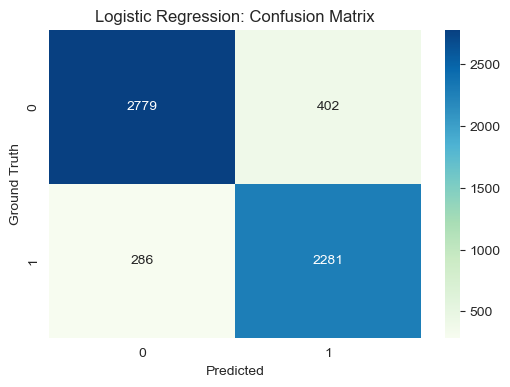

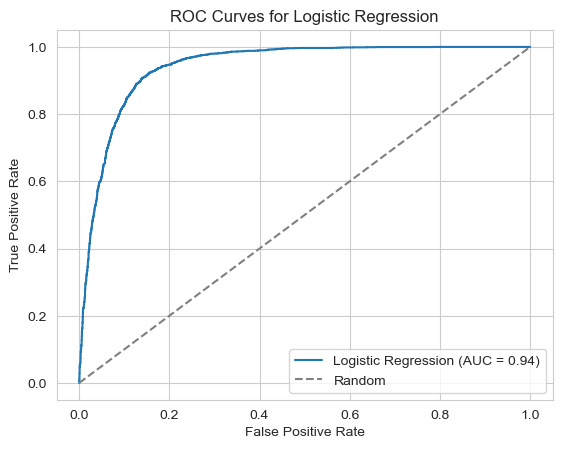

In [293]:
cm = confusion_matrix(y_test, y_preds_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.title(f'Logistic Regression: Confusion Matrix')
plt.show()

plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Deep Dive Sentiment Negative Analysis and Appendix

### N-Grams

A continuous string of words or symbols in a document. N-grams can be used to classify sentiment by creating clusters from a text dataset.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def top_grams(text, n=None, gram=None):
    
    vec = CountVectorizer(ngram_range=(gram, gram)).fit(text)
    bow = vec.transform(text)
    sum_words = bow.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    return word_freq[:n]

#### Top 20 Unigrams in Negative Sentiment

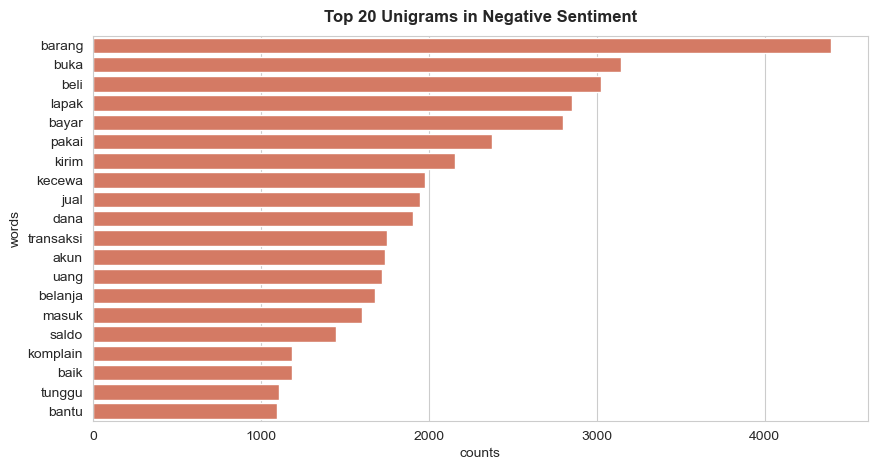

In [46]:
negative_sentiment = review_data[review_data['sentiment']== 'Negative']
common_word = top_grams(negative_sentiment.stemmed_text, 20, 1)
ngram = pd.DataFrame(common_word, columns=['words','counts'])
plt.figure(figsize=(10,5))
sns.barplot(data = ngram, x='counts', y= 'words', palette=['#e76f51'])
plt.title('Top 20 Unigrams in Negative Sentiment',pad=10, fontdict={'fontweight': 'bold'})
plt.show()

In [47]:
negative_sentiment[negative_sentiment['stemmed_text'].str.contains('barang')]['text_clean'].values.tolist()[:1]

['si paling ribet ribet buat para seller mau updateganti gambar aja susah tidak bisa diganti jika barang sudah pernah laku dengan alasan katagori tidak sesuai padahal yang merubah katagori nya pihak aplikasi nya sendiri satu satunya jalan ya di hapus bikin lagi yang baru terimakasih ']

**Observation**

Frequently occurring words in negative reviews (gram=1)

1. Frequently occurring word "barang" in negative category in sentiment analysis

Customer reviews:

*****"si paling ribet ribet buat para seller mau update ganti gambar aja susah tidak bisa diganti jika barang sudah pernah laku dengan alasan katagori tidak sesuai padahal yang merubah katagori nya pihak aplikasi nya sendiri satu satunya jalan ya di hapus bikin lagi yang baru terimakasih."*****

2. The word "buka" is a word that often appears in negative categories after the word "barang"
3. The word "beli" is a word that often appears in the negative category after the words "barang and buka"

#### Top 20 Bigrams in Negative Sentiment

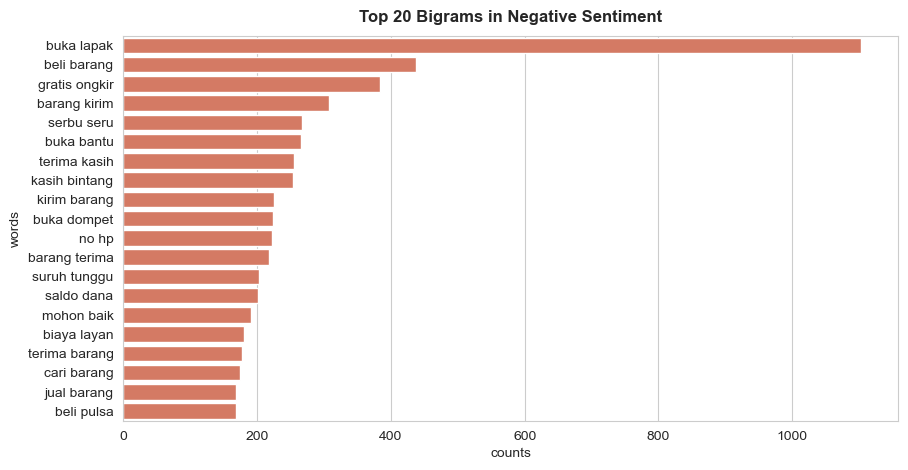

In [48]:
negative_sentiment = review_data[review_data['sentiment']== 'Negative']
common_word = top_grams(negative_sentiment.stemmed_text, 20, 2)
ngram = pd.DataFrame(common_word, columns=['words','counts'])
plt.figure(figsize=(10,5))
sns.barplot(data = ngram, x='counts', y= 'words', palette=['#e76f51'])
plt.title('Top 20 Bigrams in Negative Sentiment',pad=10, fontdict={'fontweight': 'bold'})
plt.show()

In [49]:
negative_sentiment[negative_sentiment['stemmed_text'].str.contains('gratis ongkir')]['stemmed_text'].values.tolist()[:1]

['login susah kode gratis ongkir kirim mending toko ungu gratis ongkir paylater cepat']

**Observation**

Frequently occurring words in negative reviews (gram=2)

“buka lapak, beli barang, gratis ongkir”

Customer reviews:

- *****“buka lapak dompet digital dana ribet bayar"*****
- *****“baik atur komplain rugi beli barang rusak tidak fungsi uang dibalikin beli kembali bareng rugi ongkir kesini berkat konsumen beli pulsa biaya layan harga pulsa untung”*****
- *****olshop miskin pelit voucer gratis ongkir beli pakai ongkirnya potong beli item game pajak karuan pasar masuk akal bangkrut“*****


**Conclusion:**
- App users are experiencing difficulties in making payments through digital wallets
- Damaged goods are returned to the customer but the shipping costs are not reimbursed (this can be considered for platform owners)
- Lack of engagement with customers such as providing free shipping or discounted shipping vouchers when other online shops or e-commerce are massively providing vouchers to increase loyalty.

#### Top 20 Trigrams in Negative Sentiment

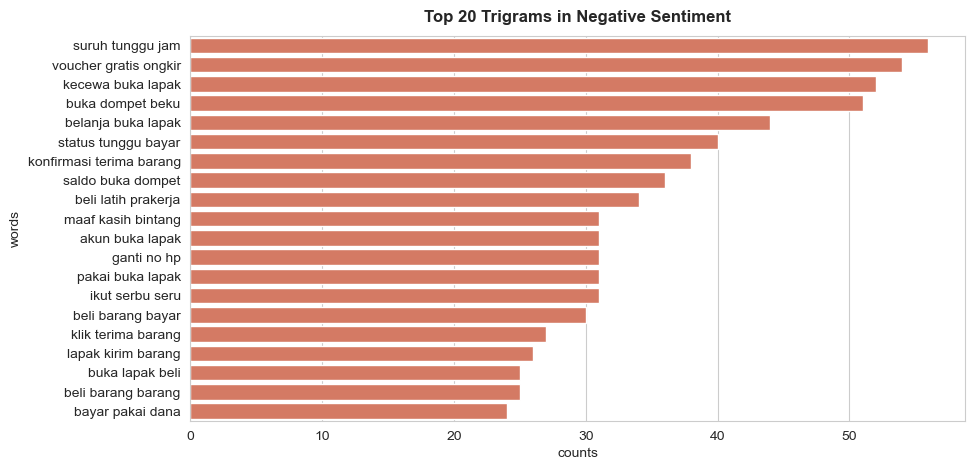

In [50]:
negative_sentiment = review_data[review_data['sentiment']== 'Negative']
common_word = top_grams(negative_sentiment.stemmed_text, 20, 3)
ngram = pd.DataFrame(common_word, columns=['words','counts'])
plt.figure(figsize=(10,5))
sns.barplot(data = ngram, x='counts', y= 'words', palette=['#e76f51'])
plt.title('Top 20 Trigrams in Negative Sentiment',pad=10, fontdict={'fontweight': 'bold'})
plt.show()### 

In [51]:
negative_sentiment[negative_sentiment['stemmed_text'].str.contains('suruh tunggu jam')]['text_clean'].values.tolist()[:1]

['e commerce yg ini hampir sudah tidak ada nilai tambahnya super nego skrg sudah tdk bs dipake percuma harganya tetap segitu ga bisa turun ongkir bahkan di mark up bisa naek sampe  dari tarif resmi kurirnya ini msh di luar asuransi pernah komplain ttg transaksi disuruh tunggu  jam  langsung dianggap masalah sudah selesai aplikasi sangat ngelag dibanding e commerce yg lain pernah komplain dibilang  cache hp dan sinyal pdhl aplikasi e commerce lain lancar di hp yg sama']

**Observation**

Frequently occurring words in negative reviews (gram=3)

“suruh tunggu jam, voucher gratis ongkir”

Customer reviews:

- *****"sudah transfer via bca virtual acount transaksi kadaluarsa padahal sudah transfer saldo di rekening bca sudah terpotong beberapa kali komplain suruh nunggu terus sekarang sudah lebih dari  jam tiap komplain jawaban seperti itu saja lebih baik belanja di tokopedia lebih amanah"*****
- *****"dulu nih aplikasi bisa bersaing dengan aplikasi belanja online lainnya ehh malah sekarang pelit voucher gratis ongkir padahal dulu selalu ada voucher gratis ongkir"*****
- *****"good by bukalapak sedih makin lama makin pelit voucher gratis ongkir mari kita pindah ke lazada  shopee"*****


**Conclusion:**

- App users complain about the waiting time service (this could be an important concern for platform owners).
- App users complain about the absence of free shipping vouchers, even though this can be one of the strategies to increase engagement with users to be loyal or loyal to use the application so that it does not lose competitiveness with other platforms.

## Summary and Business Recommendation

### Main Business Problem 

**Based of Ngrams Analysis:**

- The current application is still not user friendly because there are still customers who experience difficulties and there is no information provided if there are items or products that are removed from the platform for sellers.
- The service provided is still not optimal in handling return or refund problems
- Lack of engagement with customers because the majority of negative sentiments given on average complain about the absence of vouchers or free shipping promos. Though this can be to increase engagement with customers

### Bussines Recommendation

**Here are some suggestions for businesses that might be able to mitigate the negative sentiment:**

- Periodically evaluate the services and information provided to customers and improve the quality of the application to make it more user friendly.
- Provide vouchers or attractive promos to increase customer engagement and loyalty in using the application